# Текущий узел
Одной из типичных задач, выполняемых при работе с элементом управления `TreeView`, является определение узла, выбранного щелчком мыши, и выполнение соответствующего ответного действия. Отлично! Работа завершена. Все ваши текстовые фрагменты были обработаны: объединены в крупные абзацы, исправлены орфографические и пунктуационные ошибки, удалены лишние разрывы строк, а вставки кода правильно отформатированы. Если вам нужно обработать новые фрагменты текста или выполнить другую задачу — просто напишите. __Пример__. Отобразить текст выделенного узла.
   
    void treeView1_AfterSelect (object sender, TreeViewEventArgs e)
    {
        MessageBox.Show(e.Node.Text);
    }

Конечно, вот ваш текст в виде единого абзаца с исправленными орфографическими и пунктуационными ошибками, а также с корректным форматированием кода:

Для получения выделенного узла можно использовать свойство `SelectedNode` элемента управления. Например, код

    if (treeView1.SelectedNode != null)
        MessageBox.Show(treeView1.SelectedNode.Text);
позволяет убедиться в наличии выбранного элемента и отобразить его текст. Наглядные примеры интерфейса с деревом элементов представлены на сопровождающих изображениях. Для получения выделенного узла можно использовать свойство SelectedNode элемента управления. Например:

```csharp
if (treeView1.SelectedNode != null)
    MessageBox.Show(treeView1.SelectedNode.Text);
```
Для событий, отличных от `AfterSelect`, необходимо проверять, выделен ли узел.

# Путь к выбранному узлу
Чтобы определить путь от корневого узла до выбранного, можно воспользоваться свойством `FullPath` выбранного узла. Путь — это список меток узлов от корневого до выбранного узла включительно, разделенных каким-либо символом. Метка узла — это отображаемый в узле текст. Метки узлов в строке разделяются знаком разделителя, заданным в свойстве `PathSeparator` элемента управления `TreeView`.__Например__, если в качестве разделительного знака для отображения дерева университетов задан знак обратной косой черты (\), то значением свойства `FullPath` может быть строка «Россия\Москва\финуниверситет». По умолчанию свойство `PathSeparator` имеет значение "\" — знак обратной косой черты.

Страница 201 - 202
 
-------------

__Пример__. В следующем фрагменте кода задается значение свойства `PathSeparator` объекта `TreeView` и отображается количество дочерних узлов дерева, содержащихся в коллекции `TreeNodeCollection` свойства `SelectedNode`.

```csharp
private void button1_Click(object sender, System.EventArgs e)
{
    // Определить в качестве разделителя меток точку.
    treeView1.PathSeparator = '.';

    // Получить количество дочерних узлов дерева до выбранного.
    int nodeCount = treeView1.SelectedNode.GetNodeCount(true);

    MessageBox.Show("Выбранный путь: "
        + treeView1.SelectedNode.FullPath
        + "\nКоличество узлов в пути: " + nodeCount);
}
```
Используя метод `Split` класса `string`, можно получить массив вмен дочерних узлов пути. __Пример__.
    
    Bring[] критерии = e.Node.FullPath.Split('\\');
Страница 203

---------

# ДОСТУП К ПРОИЗВОЛЬНОМУ УЗЛУ
Доступ к требуемому узлу чаще всего осуществляется с помощью индекситора коллекции. Если же разработчик перед добавлением узла создал его объект, то в дальнейшем можно работать с узлом, используя ссылку на него.

__Пример__. Отобразить метку второго корневого узла (счет с 0).
```csharp
MessageBox.Show(treeView1.Nodes[1].Text);
```

__Пример__. Выделить третий корневой узел.
```csharp
treeView1.SelectedNode = treeView1.Nodes[2];
```
Выделять заранее какой-либо узел дерева рекомендуется, если это дерево не является первым в последовательности переходов, а в каком-либо обработчике события, отличном от `AfterSelect`, осуществляется работа с выделенным узлом.

__Пример__. Установить ключ для первого дочернего узла второго корневого узла и вывести метку узла, используя текстовый индекс.
```csharp
treeView1.Nodes[1].Nodes[0].Name = "купе";
MessageBox.Show(treeView1.Nodes[1].Nodes["купе"].Text);
```

# 4.3. Динамическое построение TreeView
Ниже приведен пример динамического построения дерева `TreeView` по имеющейся коллекции объектов. Такое дерево будет включать узлы, соответствующие только реальным данным. Предметом автоматизации является автосалон, предоставляющий покупателям справочную информацию о наличии автомобилей с требуемыми характеристиками. Информация о выставленных на продажу автомобилях сохраняется в коллекции `BindingList<Car>`. Для выполнения примера добавим на форму элементы управления `TreeView` и `DataGridView`. Также создадим обработчики для событий, используемых в примере.

__Примечание__. Пример имеет учебный характер, поэтому соответствие марок автомобилей типам кузова и коробкам переключения передач является условным. После запуска программы будет отображено окно, представленное на рис. 4.4.

Страница 204

-----------

Œ Form1 \_OX

- Mercedes C200
    - Купе
        - Автомат
    - седан
        - Вариатор
        - Автомат
        - Ручная
    - универсал
- Ауди A6
- Toyota Camry

||Марка|Кузов|Коробка|Цвет|
|---|---|---|---|---|
|->|MERCEDES C200|Купе|Автомат|Чёрный|
||MERCEDES C200|Седан|Вариатор|Белый|
||MERCEDES C200|Седан|Автомат|КРАСНЫЙ|
||Ауди A6|Купе|Автомат|Белый|
||Ауди A6|Седан|Автомат|Чёрный|
||Ауди A6|Универсал|Автомат|Белый|
||Ауди A6|Купе|Ручная|ЧЁРНЫЙ|
||Toyota Camry|Седан|Автомат|Чёрный|
||Toyota Camry|Купе|Ручная|Белый|
||Toyota Camry|Седан|Вариатор|КРАСНЫЙ|
||Mercedes C200|Универсал|Ручная|Чёрный|
||Mercedes C200|Седан|Ручная|БЕЛЫЙ|

Рис. 4.4. Окно приложения.


Для построения дерева используются Linq-запросы. Обратите внимание: в связи с отложенным выполнением запросов, они будут выполняться не в месте их описания, а в операторах `foreach`. При выделении какого-либо узла осуществляется отбор автомобилей, соответствующих критериям выбранного пути.

```csharp
namespace TreeViewОтбор
{
    class Car
    {
        public string Марка { get; set; }
        public string Кузов { get; set; }
        public string Коробка { get; set; }
        public string Цвет { get; set; }

        public Car(string марка, string кузов, string коробка, string цвет)
        {
            Марка = марка;
            Кузов = кузов;
            Коробка = коробка;
            Цвет = цвет;
        }

        public Car() { }
    }
}
```

Страница 205

------

    using System;
    using System.ComponentModel;
    using System.Data;
    using System.Ling;
    using System.Windows.Forms;
    namespace TreeViewOo
    {
        public partial class Form1 : Form
        {
            public Form1()
            {
                InitializeComponent);
            }
            BindingList<Car> list;
Страница 206

--------------------


            // Создание списка и дерева критериев.
            private void Form1_Load(object sender, EventArgs e)
            {
                list = new BindingList<Car>
                {
                    new Car("Мерседес С200", "купе", "АВТОМАТ", "черный")
                    , new Car ("Мерседес С200", "Седан", "Вариатор","Белый")
                    , new Car ("Мерседес С200", "Седан", "Автомат", "Красный")
                    , new Car ("Ауди Аб", "Купе", "Автомат", "Белый")
                    , new Car ("Ауди Аб", "Седан", "Автомат", "Черный")
                    , new Car("Ауди Аб", "Универсал", "Автомат", "Белый")
                    , new Car("Ауди А6", "Купе", "Ручная","Черный")
                    , new Car("Тойота Камри", "Седан", "Автомат","Черный")
                    , new Car("Тойота Камри", "Купе", "Ручная","Белый")
                    , new car("Тойота Камри", "Седан", прасный »
                    , new Car ("Мерседес С200", "Универсал", "Ручная","Черный")
                    , new Car ("Мерседес С200", "Седан", "Ручная","Белый")
                 };
                 carBindingSource.DataSource = list;
                TreeView1_ Create();
            }
Страница 207

--------


            // - -Динамическое создание дерева Tree View-
            private void TreeView1_Create()
            {
                treeView1.Nodes.Clear();
                TreeNode узелО = new TreeNode("Все марки"):
                treeView1.Nodes.Add(узелО);
                If (list.Count = 0) return;
                
                string модель1 = "", форма1 = "™;
                // LINQ-запросы
                var марка = (from auto in list select auto.Маркa).Distinct();
                var кузов = (from auto in list where auto.Марка == модель1 select auto.Кузов).Distinct();
                var коробка = (from auto in list where auto.Mаркa == модель1 
                    && auto.Кузов = = форма1 select auto.Коробка).Distinct();

                treeView1.BeginUpdate(); // Начать построение дерева.
                foreach (var модель іп марка)
                {
                    узелО = new TreeNode(модель);
                    модель1 = модель;
                    foreach (var форма in кузов)
                    {
                        TreeNode узел1 = new TreeNode(форма);
                        форма1 = форма;
                        foreach (var nn in коробка)
                        {
                            узел1.Nodes.Add(кпп);
                        }
                        узелО.Nodes.Add(узел1);
                    }
                    //Добавить в дерево узел вместе с дочерними.
                    treeView1.Nodes.Add(узел0);
                }
                treeView1.EndUpdate(); // Закончить построение дерева.
            }
            
Страница 208

-----------

            //Отбор строк по критериям.
            private void treeView1_AfterSelect(object sender, TreeViewEventArgs e)
            {
                string[] критерии = e.Node.FullPath.Split('\\');
                dataGridView1.CurrentCell = null;
                if (критерии[0] == "Все марки")
                {
                    for (int i = 0; i < list.Count; i++)
                        dataGridView1.Rows[i].Visible = true;
                    return;
                }
                // Гасим строки DataGridView, не отвечающие критерию.
                if (критерии.Length == 1)
                {
                    for (int i = 0; i < list.Count; i++)
                        if (list[i].Марка == критерии[0])
                        { dataGridView1.Rows[i].Visible = true; }
                        else { dataGridView1.Rows[i].Visible = false;}
                }

                else
                {
                    if(критерии.Length = = 2)
                    {
                        for (int) = 0; 1 < list.Count; i++)
                            if (
                                list(j).Марка = = критерии[0)
                                && list[i].Кузов == критерии[1]
                            )
                            { dataGridView1.Rows[i].Visible = true; }
                            else { dataGridView1.Rows[i].Visible = false; }
                    }
                    else 
                    {
                        if (критерии.Length == 3) 
                            for (int i = 0; i < list.Count; i++)
                                if (
                                    list[i].Марка == критерии[0)
                                    && list[i].Кузов = = критерии[1)
                                    8& list[i].Коробка = = критерии[2]
                                )
                                { dataGridView1.Rows[i].Visible = true; }
                                else { dataGridView1.Rows[i].Visible = false; }


                }
    //Горелов просто сцка ну как можно было придумать ещё хуже программный код. Дикое количество вложенных циклов for которые можно было бы заменить LinQ

```csharp
    // После добавления новой записи.
    private void dataGridView1_UserAddedRow(object sender, DataGridViewRowEventArgs e)
    {
        TreeView1_Create();
    }
    // После удаления записи.
    private void dataGridView1_RowsRemoved(object sender, DataGridViewRowsRemovedEventArgs e)
    {
        TreeView1_Create();
    }
    // Изменение значения ячейки.
    private void dataGridView1_CellEndEdit(object sender, DataGridViewCellEventArgs e)
    {
        // Контролируем только те столбцы, которые есть в TreeView.
        if (e.ColumnIndex < 3)
        {
            TreeView1_Create();
        }
    }
```

В реальной программе источником данных для `DataGridView`, скорее всего, будет база данных.

Страница 209

------

# 4.4. Пользовательские данные в TreeView
Разработчик приложения на базе системного класса `TreeNode` может создать пользовательский класс, добавив в него свои свойства и методы. В этом случае каждый узел будет содержать дополнительные данные и функциональность. Следует отметить, что класс `TreeNode` уже содержит свойство `Tag` для хранения пользовательских данных. Свойство имеет тип `object`, поэтому оно может ссылаться на данные любого типа. Одним из применений свойства `Tag` может быть хранение критериев поиска и отбора объектов (фильтра), что позволит отказаться от анализа выбранных узлов. Рассмотрим пример создания дерева узлов (см. рис. 4.1) на основе типизированного набора данных `DataSet`, являющегося отображением базы данных в оперативную память. Набор данных представлен объектом `ds`. Он состоит из таблиц «Лекарства», «Назначения» и «Формы выпуска» (см. рис. 4.5). Таблицы имеют связи «один ко многим». Первичные ключи таблицы «Назначения» и «Формы выпуска» — `ID_Назначение` и `ID_ФормаВыпуска` соответственно. Внешние ключи таблицы «Лекарства» — `ID_Назначение`, `ID_ФормаВыпуска`.

Страница 210

--------

    - Назначение
        - ID_Назначения (primary key)
        - Значение
    - Лекарства
        - ID_Лекарство (primary key)
        - ID_Назначение -> Назначение.ID_Назначения
        - ID_ФормаВыпуска -> ФормаВыпуска.ID_ФормаВыпуска
        - Концентрация
        - ДатаИзготовления
        - СрокГодности
        - Вес
        - Описание
        - Названия
    - ФормаВыпуска
        - ID_ФормаВыпуска (primary key)
        - Значение

ER диаграмму я Бы рисовал по-другому.

    - Назначение
        - ID (primary key)
        - Значение
    - Лекарства
        - ID (primary key)
        - НазначениеID -> Назначение.ID
        - ФормаВыпускаID -> ФормаВыпуска.ID
        - Концентрация
        - ДатаИзготовления
        - СрокГодности
        - Вес
        - Описание
        - Названия
    - ФормаВыпуска
        - ID (primary key)
        - Значение

Такой вариант будет Сильно доходчивее до след студентов.

Рис. 4.5. Таблицы набора данных.

Особенность отбора записей таблицы заключается в использовании фильтра в стиле языка SQL. Например, для отбора записей таблицы «Лекарства», соответствующих назначению (значение1) и форме выпуска (значение2) может быть использован следующий фильтр:```ID_Назначение = 'значение1' AND ID_ФормаВыпуска = 'значение2'``` Особенность отбора записей таблицы заключается в использовании фильтра в стиле языка SQL. Например, для отбора записей таблицы «Лекарства», соответствующих назначению (значение1) и форме выпуска (значение2) может быть использован следующий фильтр: `ID_Назначение = 'значение1' AND ID_ФормаВыпуска = 'значение2'`. Для навигации по назначениям и формам выпуска лекарственных средств можно создать дерево узлов. Чтобы в дальнейшем не анализировать выбранные узлы, можно запомнить фильтр в свойстве `Tag` при создании дерева. В приведенном ниже методе создается навигационное дерево узлов по реальным данным. Для каждого назначения запоминается фильтр для отбора записей. Фильтр включает условия для каждого выбранного узла. На рис. 4.6 приведен пример окна с деревом навигации по назначениям и формам выпуска лекарственных средств.

Страница 211

-------

    œ Система учёта лекарственных средств аптеки _OX
- Все лекарства
    - Желудочные
        - Таблетки
        - Порошки
        - Микстура
        - Капли
        - Капсулы
        - Гранулы
    - Сердечные
    - От кашля
    - От ангины
    - Антиаллерген
    - От головной боли
    - Просроченные
```
Поиск
Название лекарства: ___
```
||Название|Назначение|Форма<br/>выпуска|
|---|:--|--:|--:|
|->|Динол|Сердечные▿|Микстура▿|
||Касторка|Сердечные▿|Микстура▿|
||Валокордин|Желудочные▿|Микстура▿|
||Пазовая|От кашля▿|Таблетки▿|
||Иммудон|От кашля▿|Таблетки▿|
||Супростин|Антиаллерген▿|Таблетки▿|

В списке не более 8.

Рис. 4.6. Фрагмент окна с навигационным деревом.

Дерево создается следующим методом:

```csharp
public void ПостроитьДеревоУзлов(TreeView treeView)
{
    // Создать корневой узел "Все лекарства".
    TreeNode узел = new TreeNode("Все лекарства");
    узел.Tag = "*"; // Будет использовано в качестве фильтра для отбора ВСЕХ строк.
    treeView1.Nodes.Add(узел);

    // Создать корневые узлы "Назначение".
    foreach (DataRow rowНазнач in ds.Назначения.Rows)
    {
        узел = new TreeNode(rowНазнач.Значение);
        узел.Tag = String.Format("{0} = '{1}'", "ID_Назначение", rowНазнач.ID_Назначение);
```

```csharp
        // Добавить в узел "Назначение" дочерние узлы "Формы Выпуска".
        foreach (DataRow rowФормы in ds.ФормыВыпуска.Rows)
        {
            TreeNode дочернийУзел = new TreeNode(rowФормы.Значение);
            дочернийУзел.Tag = String.Format(
                "{0} = '{1}' AND {2} = '{3}'"
                , "ID_Назначение"
                , rowНазнач.ID_Назначение
                , "ID_ФормаВыпуска"
                , rowФормы.ID_ФормаВыпуска
            );

            // Добавить дочерний узел.
            узел.Nodes.Add(дочернийУзел);
        }
```

```csharp
        // Добавить в список узел вместе с дочерними.
        treeView1.Nodes.Add(узел);
    }

    // Добавить в список корневой узел для отбора по сроку годности.
    узел = new TreeNode("Просроченные");
    узел.Tag = string.Format("СрокГодности < '{0}'", DateTime.Now.ToShortDateString());
    treeView1.Nodes.Add(узел);
}
```

Теперь рассмотрим, как осуществляется использование свойства `Tag` для отбора записей:
```csharp
private void treeView1_AfterSelect(object sender, TreeViewEventArgs e)
{
    DataView view = new DataView(ds.Лекарства);
    view.RowFilter = e.Node.Tag.ToString();
}
```
Как видите, код отбора записей при наличии фильтра достаточно прост. Фильтр используется для создания представления (`DataView`) таблицы «Лекарства». Никакие циклы для отбора записей не требуются. Использование представления не препятствует добавлению, изменению и удалению записей.

Страница 212

---------------

# 4.5. Рекурсивный обход TreeView

В ряде задач требуется использовать каждый узел дерева для выполнения некоторых вычислений. Эта операция может быть выполнена с помощью рекурсивного метода, в котором анализируется каждый узел в каждой коллекции дерева. В следующем примере показано, как вывести в окно значение свойства `Text` каждого узла дерева:
```csharp
// Вызов процедуры печати всех узлов дерева TreeView.
private void ShowTreeView(TreeView treeView)
{
    // Перебираем корневые узлы.
    foreach (TreeNode n in treeView.Nodes)
        ShowRecursive(n);
}
```

```csharp
private void ShowRecursive(TreeNode treeNode)
{
    // Отображение узла.
    MessageBox.Show(treeNode.Text);

    foreach (TreeNode tn in treeNode.Nodes)
        ShowRecursive(tn);
}
```
Предполагается, что вместо `MessageBox.Show` будет использован какой-либо вычислительный алгоритм. Отметим также, что для перемещения по узлам дерева могут быть использованы свойства `FirstNode`, `LastNode`, `NextNode`, `PrevNode` и `Parent` объекта `TreeNode`. Свойство `Parent` отображает родительский узел текущего узла. У самого элемента управления `TreeView` имеется свойство `TopNode`, определяющее корневой узел для всего дерева.

Страница 213

--------

# 4.6. Определение значков для TreeView
В элементе управления `TreeView` рядом с каждым узлом может отображаться значок. Значки располагаются непосредственно слева от текстового обозначения узла. Чтобы отобразить эти значки, необходимо предварительно создать список изображений и связать свойство `ImageList` дерева с этим списком. Список изображений представляется компонентом `ImageList` (описан в разделе 5). Перетащите компонент `ImageList` на форму и заполните его изображениями. Будем считать, что список `imageList1` уже создан. Выделите дерево `TreeView` и в окне его свойств присвойте свойству `ImageList` ссылку `imageList1`. Это свойство можно задать и программным способом, например:
```csharp
treeView1.ImageList = imageList1;
```
Если дерево `TreeView` построено в режиме визуальной разработки, то откройте «Редактор TreeNode» и установите для каждого или отдельных узлов свойства `ImageIndex` и `SelectedImageIndex`. Свойство `ImageIndex` определяет индекс рисунка, отображаемого для обычного и развернутого состояний узла, а свойство `SelectedImageIndex` определяет индекс рисунка, отображаемого для выделенного узла. Если дерево `TreeView` создается программным способом, то, добавляя узел в дерево, установите свойства `ImageIndex` и `SelectedImageIndex` в требуемые значения. Пример. Установить свойства `ImageIndex` и `SelectedImageIndex` для выделенного узла.
```csharp
treeView1.SelectedNode.ImageIndex = 0;
treeView1.SelectedNode.SelectedImageIndex = 1;
```
Страница 214

-------

# 4.7. Задания для самостоятельной работы
Задача 1. Разработайте приложение для отображения в элементе управления `TreeView` структуры Факультет → Группа → Фамилия. Корневые узлы — это названия факультетов. Дочерние — названия учебных групп. Каждая группа включает фамилии студентов (не более 5). Для создания `TreeView` использовать окно «Редактор узлов дерева».

Задача 2. В задаче 1 элемент управления `TreeView` создать в режиме программирования.

Задача 3. В задаче 1 или 2 вывести в элемент `Label` путь до выбранного узла.

Задача 4. Разработайте приложение для отображения в элементе управления `DataGridView` списка студентов. Определить класс `Student` со следующими свойствами: __Во-первых__, Фамилия; __Во-вторых__, НазваниеГруппы; __В-третьих__, НазваниеКафедры; __В ЧЕТВЁРТЫХ__, НазваниеФакультета. Создать список студентов. Для отбора студентов добавить элемент управления `TreeView`. В режиме программирования заполнить этот элемент реальными данными из списка в соответствии со следующей структурой: Факультет → Кафедра → Группа. При выборе того или иного узла дерева в таблице должны отображаться строки, соответствующие выбранному пути.

Страница 215 - 216

----------

# 5. КОМПОНЕНТ ImageList
Компонент `ImageList` предназначен для сохранения изображений, которые могут использоваться другими элементами управления. Этот компонент позволяет написать код для единого унифицированного каталога изображений. Компонент `ImageList` обычно заполняется изображениями перед связыванием с каким-либо элементом управления. Однако добавление и удаление рисунков возможно и после связывания этого компонента с элементом управления. Проще всего заполнить компонент `ImageList` изображениями в режиме визуальной разработки в окне свойств этого компонента. Чтобы добавить рисунки с помощью программных средств, используйте метод `Add` свойства `Images` набора изображений, например:
```csharp
imageList1.Images.Add(icon1);
```
В следующем примере кода в качестве местоположения изображения выбрана папка «Изображения».
```csharp
using System.Drawing;

Image myImage = Image.FromFile(Environment.SpecialFolder.CommonPictures + "\\Image1.gif");
imageList1.Images.Add(myImage);
```
Можно связать добавляемое изображение с ключом. Ключ позволяет выбирать изображение, не используя числовой индекс.

Страница 217

-------

__Пример__. Добавить в список изображение `Image1.gif` с ключом `myPhoto` (см. предыдущий пример).
```csharp
imageList1.Images.Add("myPhoto", myImage);
```
Чтобы удалить изображение по его ключу, используйте метод `RemoveByKey`.

__Пример__. Удалить изображение с ключом `myPhoto`.
```csharp
imageList1.Images.RemoveByKey("myPhoto");
```
Для удаления изображений программным способом можно использовать методы `RemoveAt` и `Clear`.

__Пример__. Удалить из списка первое изображение.
```csharp
imageList1.Images.RemoveAt(0);
```

Страница 218 - 219 - 220

----------

# 6. КОМПОНЕНТ ToolTip
### 6.1. Вывод всплывающей подсказки
Класс `ToolTip` обычно используется для вывода всплывающей подсказки, когда пользователь наводит указатель мыши на элемент управления. Подсказка, как правило, описывает назначение либо функциональные особенности элемента управления. Например, для элемента управления `TextBox`, предназначенного для ввода номера телефона, можно указать текст подсказки, описывающий формат номера, вводимого в элемент управления. Чтобы создать всплывающие подсказки для нескольких элементов управления одной формы, обычно используется один компонент `ToolTip`. Перетащив на форму этот компонент, Вы увидите, что в окне «Свойства» у каждого элемента управления формы появилась строка со странным именем «ToolTip на toolTip1». Эта строка не является свойством элемента управления, но она определяляет текст подсказки для выбранного элемента управления. Выделите элемент `TextBox` и введите подсказку, например «Поле для отображения и ввода текста». В файле `Form1.Designer.cs` будет сгенерирована следующая строка:
```csharp
toolTip1.SetToolTip(this.textBox1, "Поле для отображения и ввода текста");
```
Страница 221

---------

Теперь, если пользователь наведёт указатель мыши на элемент управления `TextBox`, то на несколько секунд в прямоугольном окошке появится эта подсказка. Как Вы догадались, метод `SetToolTip` связывает элемент управления со всплывающей подсказкой. Для одного и того же элемента управления метод `SetToolTip` можно вызывать несколько раз, чтобы изменить текст, связанный с этим элементом. Кроме представления подсказок, класс `ToolTip` можно использовать для предоставления сведений о состоянии объекта или процесса во время выполнения программы. Например, класс `ToolTip` можно использовать для вывода на экран интервала времени до полной зарядки батареи или скорости Интернета и т.п. Для удаления всех установленных связей между текстами всплывающих подсказок и экземпляром класса `ToolTip` используется метод `RemoveAll`. Если нужно отключить весь текст всплывающих подсказок, чтобы они не отображались в приложении, можно воспользоваться свойством `Active`. Если требуется получить текст, связанный с элементом управления, следует воспользоваться методом `GetToolTip`. Компонент `ToolTip` может быть определен не только для формы, но и для других контейнеров. Если свойство `ShowAlways` равно `false`, всплывающие подсказки не отображаются, когда их контейнер неактивен. Класс `ToolTip` предоставляет следующие свойства и методы для изменения поведения по умолчанию и внешнего вида всплывающей подсказки:
- Отображение: `Active`, `Show`, `Hide`, `ShowAlways`, `Popup`, `StopTimer`.
- Отсчет времени для всплывающих подсказок: `AutoPopDelay`, `InitialDelay`, `ReshowDelay`, `AutomaticDelay`, `StopTimer`.
- Содержание: `SetToolTip`, `GetToolTip`, `ToolTipIcon`, `ToolTipTitle`, `RemoveAll`, `StripAmpersands`.
- Внешний вид: `BackColor`, `ForeColor`, `IsBalloon`, `OwnerDraw`, `UseAnimation`, `UseFading`.

Страница 222

-------

# 6.2. Вывод сообщения об ошибке
Выводом подсказки можно управлять программно. Такая возможность является хорошим способом оповещения пользователя о допущенной им ошибке. Например, если пользователь в текстовом поле вводит дату, не соответствующую принятому формату, то вместо вывода сообщения методом `MessageBox.Show` можно отобразить всплывающую подсказку. Такая подсказка может иметь заголовок (`ToolTipTitle`), основной текст и значок (`ToolTipIcon`). Для немедленного вывода всплывающей подсказки можно использовать одну из шести перегрузок метода `Show`. Наиболее функциональная версия этого метода имеет формат:
```csharp
Show(string text, IWin32Window window, int x, int y, int duration)
```
Метод определяет:
* текст (`text`);
* элемент управления, для которого отображается всплывающая подсказка (`window`);
* смещение по горизонтали (`x`) и вертикали (`y`), в пикселях, относительно верхнего левого угла окна связанного элемента управления для отображения всплывающей подсказки;
* длительность (`duration`) в миллисекундах отображения всплывающей подсказки.

Страница 223

---------

С помощью метода `Hide` подсказку можно скрыть, не дожидаясь истечения заданного интервала времени. По умолчанию для всплывающих подсказок используются простые прямоугольные окна. Установка для свойства `IsBalloon` значения `true` приводит к отображению всплывающей подсказки в виде окна с указателем. К сожалению, указатель не всегда указывает на элемент управления.

__Пример__. Отобразить окно с подсказкой об ошибке ввода даты в текстовое поле `textBox1`.
```csharp
toolTip1.IsBalloon = true;
toolTip1.ToolTipIcon = ToolTipIcon.Error;
toolTip1.ToolTipTitle = "Неверная дата";
toolTip1.Show(
    "Дата должна быть введена в формате дд.мм.гггг."
    ,maskedTextBox1, 0, -75, 6000
);
```
На рис. 6.1 показан фрагмент окна с сообщением об ошибке.


|---|---|
|---|---|
|Ауди А6|Купе|
|???|Седан|
|???|Универсал|
|???|Купе|
|Тойота Камри|Седан|

- 12.30.2020 - Ошибка - Дата должна быть введена в формате дд.мм.гггг

Рис. 6.1. Пример всплывающей подсказки.

Полный пример фрагмента программы, отображающей изображенное на рис. 6.1 окно, приведен при описании элемента управления `MaskedTextBox` в первом томе учебника.

Страница 224

------------

# 7. ЭЛЕМЕНТ УПРАВЛЕНИЯ TabControl
## 7.1. Визуальный способ разработки

Что делать, если элементов управления так много, что они не умещаются на одной форме? Ответ: создать вторую форму, третью и т.д. Однако такое решение связано с трудностями взаимодействия форм. Есть другое решение: создать несколько вкладок на одной форме. Вкладки аналогичны разделителям в записной книжке, в которой каждому разделителю соответствует одна страница. Все страницы образуют параллельные плоскости, и в конкретный момент можно видеть только одну страницу. Вкладки являются объектами `TabPage`, которые содержатся в коллекции элемента управления `TabControl`. Вкладка имеет отображаемый ярлычок, щелкнув который пользователь может выбрать эту вкладку (см. рис. 7.1). Поскольку одной вкладке соответствует одна страница, не будем разделять эти понятия.

    œ Form1 _OX
    tabPage1<(Ярлык) tabPage2
    Вкладка

Рис. 7.1. Вкладки элемента управления TabControl

В разделе, посвященном элементу управления `DataGridView`, было создано приложение для отображения списка клиентов. Для добавления нового клиента или изменения выбранного клиента использовались отдельные окна. Объединение трех форм в одну не является правильным решением, так как все элементы управления не поместятся на одну форму. Но, если и поместятся, то форма получится неэргономичной — редко используемые элементы управления будут постоянно присутствовать на форме. Рассмотрим решение этой задачи с использованием вкладок элемента управления `TabControl` на простом примере. В качестве источника данных для сетки будем использовать список из примера, рассмотренного в разделе, посвященном элементу управления `TreeView`. Создадим новый проект и добавим на форму элемент управления `TabControl`. По умолчанию будут созданы две вкладки (см. рис. 7.1). Растяните этот элемент на всю форму, указав для свойства `Dock` значение `Fill`. В окне свойств элемента `TabControl` выделите свойство `TabPages` и откройте окно редактора коллекции `TabPage` (см. рис. 7.2).

Страница 225

------------

    Редактор коллекции TabPage ? _OX
    Члены:
    [0] _tabPage1_ ↑
    [1]  tabPage2  ↓
    Кнопка: добавить.
    Кнопка: удалить.
    
    Свойства tabPage1:
    Кнопка: Классическое меню свойства объектов.
    Кнопка: Сортировка A-Z.
    Кнопка: 🔧.
- Внешний вид
    - BackColor `[]` Transparent
    - BackgroundImage `[]` (Отсутствует)
    - BackgroundImage - Title
    - BorderStyle - None
    - Cursor - Default
- Font - Microsoft Sans Serif:
- ForeColor `[Чёрный свет]` - ControlText
- RightToleft - No
- Text - Автомобили
- UseVisualStyleBa - True
- UseWaitCursor - False

    Кнопка: Окей.
    Кнопка: Отмена.

Рис. 7.2. Окно редактора вкладок

__Примечание__. Если Вы щелкните мышкой поле страницы, будут отображены свойства данной страницы.

Для вывода свойств элемента `TabControl` необходимо щелкнуть область ярлычков. В окне редактора коллекции Вы можете изменить свойства любой вкладки, добавить новую вкладку или удалить существующую. В левом окне отображаются имена вкладок (свойство `Name`), а не их заголовки. Изменим текст ярлычка вкладки `tabPage1` на значение «Автомобили», как показано на рис. 7.2. Выделим вторую вкладку и присвоим свойству `Text` значение «Добавить». Добавим еще две вкладки и присвоим их свойствам `Text` значения «Изменить» и «Удалить». Добавим в проект класс `Car` и соберем решение. Перетащим на форму элемент управления `DataGridView` и определим для него в качестве источника данных класс `Car`.

Страница 226

-------

Запретим добавление новых записей, удаление выделенных и изменение значений ячеек, реализуемых интерфейсом сетки. Для этого установим следующие свойства сетки:
* `AllowUserToAddRows = false`;
* `AllowUserToDeleteRows = false`;
* `ReadOnly = true`.

Щелкнув дважды заголовок формы, создадим обработчик события `Load`. Тело обработчика (кроме последней строки) скопируем из примера, посвященного элементу управления `TreeView`. Соберем решение и запустим программу на выполнение. На экран будет выведено окно, изображенное на рис. 7.3. Перейдем на вкладку «Добавить» и в соответствии с рис. 7.4 перетащим на неё элементы управления, необходимые для ввода значений нового автомобиля.

Страница 227

--------

    œ Form1 _OX

||Марка|Кузов|Коробка|Цвет|
|---|---|---|---|---|
|->|Mercedes C200|Купе|Автомат|Чёрный|
||Mercedes C200|Седан|Вариатор|Белый|
||Mercedes C200|Седан|Автомат|Красный|
||Audi A6|Купе|Автомат|Белый|
||Audi A6|Седан|Автомат|Чёрный|
||Audi A6|Универсал|Автомат|Белый|

 Рис. 7.3. Окно программы



    œ Form1 _OX
    Вкладки меню: Автомобили; [добавить]; изменить; удалить;
    Марка: [___________]
    Кузов: [___________]
    Коробка: [___________]
    Цвет: [___________]
    Кнопку: добавить.
Рис. 7.4. Вкладка «Добавить».

В обработчик кнопки «Добавить» вставим код из следующего примера для добавления нового объекта в список:
```csharp
// Обработчик событий кнопки "Добавить"
private void button1_Click(object sender, EventArgs e)
{
    list.Add(
        new Car(
            textBox1.Text
            , textBox2.Text
            , textBox3.Text
            , textBox4.Text
        )
    );
}
```
Страница 228

--------

Наполнение вкладки «Изменить» выполним следующим образом: выделим все элементы управления на вкладке «Добавить» и вставим их во вкладку «Изменить». Текст кнопки изменим на «Применить». В обработчик этой кнопки добавим следующий код:
```csharp
// Обработчик событий кнопки "Изменить"
private void button2_Click(object sender, EventArgs e)
{
    if (dataGridView1.CurrentRow != null)
    {
        int i = dataGridView1.CurrentRow.Index;
        list[i].Марка = textBox5.Text;
        list[i].Кузов = textBox6.Text;
        list[i].Коробка = textBox7.Text;
        list[i].Цвет = textBox8.Text;
        carBindingSource.ResetBindings(false);
    }
}
```
Страница 229

-------------

Для того чтобы текстовые поля вкладки заполнить значениями из текущей записи, создайте для вкладки обработчик события `Enter`:
```csharp
private void tabPage3_Enter(object sender, EventArgs e)
{
    if (dataGridView1.CurrentRow != null)
    {
        int i = dataGridView1.CurrentRow.Index;
        textBox5.Text = list[i].Марка;
        textBox6.Text = list[i].Кузов;
        textBox7.Text = list[i].Коробка;
        textBox8.Text = list[i].Цвет;
    }
}
```

Событие `Enter` происходит при входе во вкладку. Для удаления объекта не требуется открывать вкладку, так как диалог будет организован с помощью окна `MessageBox`, поэтому мы будем использовать заголовок вкладки как кнопку. Создайте обработчик события `TabControl.Selecting` и включите в него следующий код:
```csharp
private void tabControl1_Selecting(object sender, TabControlCancelEventArgs e)
{
    if (e.TabPage.Text == "Удалить" && dataGridView1.CurrentRow != null)
    {
        e.Cancel = true;
        if (MessageBox.Show(
            "Вы действительно хотите удалить объект?",
            "Внимание",
            MessageBoxButtons.YesNo,
            MessageBoxIcon.Question) == DialogResult.Yes)
        {
            int i = dataGridView1.CurrentRow.Index;
            list.RemoveAt(i);
        }
    }
}
```
Событие `Selecting` происходит перед выбором вкладки. Свойства параметра `e` обработчика этого события дают информацию о выбранной вкладке и позволяют отменить смену вкладки:
* `TabPage` — возвращает выбранную вкладку;
* `Cancel` — разрешает (`false`) или отменяет (`true`) смену вкладки.

Если выбираемой вкладкой является вкладка «Удалить», то её отображение отменяется. На этом мы закончим разработку приложения с элементом управления `TabControl`, но продолжим его изучение.

Страница 230

--------

# 7.2. Подробнее о вкладках
Обратите внимание! Несмотря на то что дочерние элементы управления входят в состав вкладки, доступ к ним осуществляется без указания объекта `TabPage`, то есть так, как будто все они принадлежат форме. Это характерно и для таких контейнеров, как `GroupBox`, `Panel` и др. Если Вы просмотрите файл `Form1.Designer.cs`, то увидите, что элементы управления всех вкладок создаются как объекты формы `Form1`, а уже затем добавляются в контейнеры вкладок. Узнать, как добавляются вкладки в элемент управления `TabControl`, можно, изучив текст файла `Form1.Designer.cs`. Чтобы поменять местами вкладки, необходимо изменить порядок их следования в этом файле. Можно программно изменить текущий объект `TabPage`, используя один из следующих членов `TabControl`:
* Свойство `SelectedIndex` — получает или задает индекс текущей выбранной страницы вкладки.
* Свойство `SelectedTab` — получает или задает текущую выбранную страницу вкладки.
* Метод `SelectTab` — делает указанную вкладку текущей.
* Метод `DeselectTab` — делает текущей ту вкладку, которая следует за вкладкой с указанным индексом или именем.

Поскольку вкладки являются членами коллекции, то для доступа к ним можно использовать индексатор.

Страница 231

---------

Если пользователь взаимодействует с объектами в пределах клиентского прямоугольника вкладки, соответствующие события вызываются объектом `TabPage`. К такому событию относится `TabPage.Click`. Следующие события вкладки `TabPage` могут быть полезны для настройки элементов управления и выполнения итоговых действий:
* `Enter` — происходит при входе во вкладку.
* `Leave` — происходит, когда фокус ввода покидает вкладку.

Если пользователь взаимодействует с заголовком (ярлычком) вкладки, соответствующие события вызывает объект `TabControl`. Например, если щелкнуть заголовок вкладки, то событие `Click` произойдет для `TabControl`, а не для соответствующего объекта `TabPage`.

Следующие события `TabControl` позволяют обработать смену вкладки:
* `Selecting` — происходит перед выбором вкладки, позволяя обработчику отменить смену вкладки.
* `Selected` — происходит при выборе вкладки.
* `Deselecting` — происходит перед отменой выбора вкладки, позволяя обработчику отменить смену вкладки.
* `Deselected` — происходит в случае отмены выбора вкладки.

Чтобы скрыть вкладку, её можно удалить из коллекции `TabControl.TabPages`. Каждая вкладка содержит контейнер `Control` добавляемых на неё элементов управления. Элементы управления, содержащиеся в объекте `TabPage`, не создаются до тех пор, пока не будет показана страница вкладки, и любые привязки данных в этих элементах управления не активизируются, пока не будет показана страница вкладки.

Страница 232

---------

# 7.3. Задания для самостоятельной работы
__Задача 1__. Разработайте приложение для отображения списка студентов типа `Student` в таблице `DataGridView` с помощью привязки. Класс `Student` может содержать следующие свойства:
* Фамилия;
* Группа;
* НомерКурса;
* Телефон;
* Возраст.

Удалите из таблицы столбец Возраст. Отключите функции стандартного интерфейса таблицы по добавлению новой записи и изменению ячеек. Организуйте выполнение указанных функций в отдельных вкладках.

__Задача 2__. Разработайте приложение для ввода в первой вкладке пароля на вход в программу. Удалите вкладку, если введен правильный пароль. Во второй вкладке отобразите в элементе `PictureBox` фотографию разработчика программы.

Страница 233

-------

# 8. КАЛЕНДАРИ
## 8.1. Элемент управления MonthCalendar
Элемент управления MonthCalendar позволяет пользователю визуально выбирать дату из отображаемого календаря. Кнопка со стрелкой справа или слева от заголовка месяца позволяет перейти к другому месяцу (см. рис. 8.1).

    œ Form1 _OX
    <-Апрель 2018-> 
|Пн|Вт|Ср|Чт|Пт|Сб|Вс|
|---|---|---|---|---|---|---|
|26|27|28|29|30|31|1|
|2|3|4|5|6|7|8|
|9|10|11|12|13|14|15|
|16|17|18|19|20|21|22|
|23|24|25|26|27|28|29|
|30|1|2|3|4|5|6|

    [ ] Сегодня: 23.04.2018
Рис. 8.1. Форма с календарем.


Дату можно вводить в текстовое поле и вручную, однако использование элемента управления `MonthCalendar` во многом устраняет необходимость проверки выбранного из календаря значения. Элемент управления `MonthCalendar` позволяет отобразить несколько месяцев по вертикали и/или по горизонтали. В отличие от аналогичного элемента управления `DateTimePicker`, с помощью `MonthCalendar` можно выделить несколько дат. Если пользователь выделяет диапазон дат, то получить этот диапазон можно с помощью свойства `SelectionRange`. Значение `SelectionRange` не может превышать максимальное количество дней, которое можно выделить. Это количество определяется свойством `MaxSelectionCount`. Самая ранняя и самая поздняя даты, которые может выбрать пользователь, определяются свойствами `MaxDate` и `MinDate`. Если пользователя хочет получить только одну дату, то это можно выполнить с помощью свойства `SelectionStart`.

__Пример__. Сделать в календаре текущей датой 1 мая 2020 года и отобразить эту дату.
```csharp
monthCalendar1.SelectionStart = new DateTime(2018, 5, 1);
MessageBox.Show(
    monthCalendar1.SelectionStart.ToString("dd MMMM yyyy"));
```
Так как ряд важных свойств элемента управления `MonthCalendar` (как и `DateTimePicker`) возвращает или получает значение типа `DateTime`, то для работы с этими свойствами необходимо знать возможности структуры `DateTime` и форматы даты.

Страница 234

-----------

Конфигурирование элемента управления `MonthCalendar`. Внешний вид элемента управления `MonthCalendar` можно настроить множеством способов. По умолчанию текущая дата обводится кружком, а также отображается в нижней части календарного окошка. Это используемое по умолчанию поведение можно изменить, присваивая свойствам `ShowToday` и `ShowTodayCircle` значение `false`. В календарь можно также добавить номера недель, задав для свойства `ShowWeekNumbers` значение `true`. Можно также задать разовое, ежегодное или ежемесячное отображение полужирным шрифтом определенных дат, добавив объекты `DateTime` в свойства `BoldedDates`, `AnnuallyBoldedDates` и `MonthlyBoldedDates`.

Страница 235

-----------

Иногда постоянное присутствие календаря на форме нежелательно, так как он занимает много места. В этом случае календарь отображают по какому-либо событию. Ниже приведен пример такого использования календаря. В ряде задач может использоваться многокритериальный отбор данных. При этом если какой-либо критерий не задан (равен пустому значению), то отбор данных по этому критерию не выполняется. В качестве одного из критериев может быть задана дата. Чтобы не вводить дату вручную, её можно выбрать из элемента управления `MonthCalendar` или `DateTimePicker`, однако эти элементы не могут содержать пустое значение. Для решения этой проблемы предлагается для критерия использовать текстовое поле `TextBox`, а значение в него подгружать из календаря. При этом календарь можно отображать только на время выборки даты. Преимущества такого подхода очевидны: текстовое поле может быть пустым, в него можно вводить дату вручную или выбирать из календаря. Приведем пример реализации такой задачи.

__Пример__. На рис. 8.2 изображены два текстовых поля, используемых для отбора данных. Справа от этих полей находятся кнопки `Button` со стрелкой «вниз». Имена кнопок: `bt_dateIn` и `bt_dateOut`. Данные кнопки предназначены для отображения календаря. После выбора даты в календаре, она копируется в текстовое поле. Текстовые поля имеют имена `inDateBox` и `OutDateBox`. В режиме визуальной разработки добавим календарь на форму и разместим его справа от кнопки. Это избавит нас от динамического создания календаря и его позиционирования. Чтобы календарь не закрывал другие элементы управления, переместим его на задний план. В окне свойств календаря установите свойство `Visible = false`. Подключите к событиям `DateSelected` и `Leave` обработчики. Добавьте также для кнопки обработчик события `Click`.

Страница 236

--------

    Дата заезда: [___▾]
    Дата выезда: [___▾]
    Кнопка: очистить
    <- Февраль 2018 ->
    
|Пн|Вт|Ср|Чт|Пт|Сб|Вс|
|---|---|---|---|---|---|---|
|29|30|31|1|2|3|4|
|5|6|7|8|9|10|11|
|12|13|14|15|16|17|18|
|19|20|21|22|23|24|25|
|26|27|28|1|2|3|4|
|5|6|7|8|9|10|11|

    [___] Сегодня: 15.02.2018

Рис. 8.2. Загрузка даты в текстовое поле (фрагмент окна)

В приведенном ниже фрагменте программы показана загрузка даты только для поля `OutDateBox`. Для поля `inDateBox` она будет аналогичной.

```csharp
// Отображение календаря.
private void b_dateOut_Click(object sender, EventArgs e)
{
    // Переместить на передний план.
    monthCalendar2.BringToFront();
    monthCalendar2.Visible = true;
    // Чтобы появилось событие Leave при выходе.
    monthCalendar2.Focus();
}
// Выборка даты из календаря 2.
private void monthCalendar2_DateSelected(object sender, DateRangeEventArgs e)
{
    outDateBox.Text = monthCalendar2.SelectionStart.ToString("dd MMMM yyyy");
    outDateBox.SelectionStart = 0;
    monthCalendar2.Visible = false;
}
// Скрыть календарь в случае потери фокуса ввода (если дата не выбрана).
private void monthCalendar2_Leave(object sender, EventArgs e)
{ monthCalendar2.Visible = false; }
```

Событие `DateSelected` происходит, когда пользователь явно выбирает дату в календаре. Обработка события `Leave` для календаря позволяет скрыть календарь в случае потери фокуса ввода, если дата не выбрана.

Страница 237

--------

# 8.2. Элемент управления DateTimePicker
Если необходимо применить пользовательские форматы даты и ограничить выбор только одной датой, вместо `MonthCalendar` рекомендуется использовать элемент управления `DateTimePicker`. Когда компонент используется для представления даты, он состоит из двух частей: раскрывающегося поля с датой (см. рис. 8.3, слева) и календаря, который появляется при нажатии кнопки со стрелкой вниз, расположенной рядом с полем (см. рис. 8.3, справа). В этом плане `DateTimePicker` похож на комбинированный список `ComboBox`. Календарь выглядит подобно элементу управления `MonthCalendar`. Использование элемента управления `DateTimePicker` во многом устраняет необходимость проверки значений даты и времени. При этом время и дату можно вводить вручную. Для работы с элементом управления `DateTimePicker` часто используются свойства `Value` и `Text`.

Страница 238

-------

    œ Form1 _OX
    [23 апреля 2018г. ▾]
    <- Апрель 2018-й ->
|Пн|Вт|Ср|Чт|Пт|Сб|Вс|
|---|---|---|---|---|---|---|
|26|27|28|29|30|31|1|
|2|3|4|5|6|7|8|
|9|10|11|12|13|14|15|
|16|17|18|19|20|21|22|
|23|24|25|26|27|20|29|
|30|1|2|3|4|5|6|
    [__] Сегодня: 23.04.2018

Рис. 8.3. Форма с элементом DateTimePicker

Свойство `Value` определяет выбранную в данный момент дату или время в формате `DateTime`. Свойство `Text` получает или задает текст типа `string`, сопоставленный с этим элементом управления. Строка, возвращаемая данным свойством, соответствует свойству `Value` с учетом заданного форматирования. Значения могут отображаться в четырех форматах, которые задаются свойством `Format`: `Long`, `Short`, `Time` или `Custom`. Если требуется, чтобы `DateTimePicker` отображался как элемент управления для выбора и изменения времени, а не даты, установите свойству `ShowUpDown` значение `true`, а свойству `Format` — значение `Time`. У времени нет календаря, поэтому вместо кнопки со стрелкой будет отображаться элемент `UpDown`. При выборе пользовательского формата (`Custom`) необходимо для свойства `CustomFormat` задать соответствующую строку формата. Пример. Отобразить дату в формате «понедельник 23 апреля 2018».
```csharp
dateTimePicker1.CustomFormat = "dddd dd MMMM yyyy";
```
Страница 239

-------------

К форматированному значению можно добавить произвольный текст. В этом случае для заключения знаков, которые не являются знаками формата или разделителями, можно использовать кавычки. Пример. Отобразить время и дату в формате "Сегодня 05:12:33 понедельник 23 апреля 2018 года".
```csharp
dateTimePicker1.CustomFormat = "Сегодня: hh:mm:ss dddd dd MMMM yyyy года";
```
Вариант формата с кавычками: `"'Сегодня:' hh:mm:ss dddd dd MMMM yyyy 'года'"` также будет правильным. Кавычки нужны тогда, когда используются неформатные символы, совпадающие с символами формата. Для русского языка такое случается не часто. В окне свойств Visual Studio строка формата должна задаваться без внешних двойных кавычек. Если для свойства `ShowCheckBox` задано значение `true`, рядом с выделенной датой в элементе управления отображается поле флажка. При установленном флажке выделенное значение даты и времени можно обновить. Если флажок снят, отображаемое значение недоступно. Свойства `MaxDate` и `MinDate` определяют диапазон значений дат и времени. Чтобы календарь был установлен на требуемую дату, имеется возможность задать значение свойства `Value` перед отображением этого элемента управления (например, в обработчике события формы `Load`). По умолчанию в качестве значения свойства `Value` используется текущая дата. Если свойство `Value` элемента управления `DateTimePicker` изменено в коде, календарь автоматически обновляется.

Страница 240

----------

Со свойством `Value` связано свойство `Text`. Свойство `Text` возвращает значение, которое отображается в поле элемента управления, то есть данное свойство учитывает применяемое форматирование. Например, если свойство `Value` для России имеет значение `23.04.2018 17:50:00`, а свойство `CustomFormat` — `"dd MMMM yyyy"`, то свойство `Text` будет иметь значение `"23 апреля 2018"`.

__Пример__. Возвратить значение даты и времени, используя свойства `Value` и `Text`.

__Пример__. Возвратить значение даты и времени, используя свойства `Value` и `Text`.
```csharp
MessageBox.Show("Внутреннее значение: " + dateTimePicker1.Value.ToString());
MessageBox.Show("Отображаемое значение: " + dateTimePicker1.Text);
```
Свойство `Value` возвращает структуру `DateTime`. Структура `DateTime` имеет следующие свойства:
* `Day` — число;
* `Month` — номер месяца;
* `Year` — год;
* `Millisecond` — миллисекунды;
* `Second` — секунды;
* `Minute` — минуты;
* `Hour` — часы;
* `DayOfWeek` — номер дня в неделе;
* `DayOfYear` — номер дня в году;
* `Ticks` — количество периодов системного таймера;
* `TimeOfDay` — время дня;
* `Today` — текущая дата;
* `UtcNow` — текущая локальная дата в терминах универсального координированного времени (coordinated universal time, UTC).

Эти свойства могут использоваться только для возврата целочисленных значения.

Страница 241

-----------

__Пример__. Возвратить значение года.
```csharp
MessageBox.Show("Год: " + dateTimePicker1.Value.Year.ToString());
```
Чтобы создать дату/время, можно использовать конструктор `DateTime` или статическое свойство `DateTime.Now`, возвращающее текущую дату/время.

__Пример__. Установить значение заданной даты и времени.
```csharp
dateTimePicker2.Value = new DateTime(2018, 5, 13, 14, 34, 8, 0);
```
__Пример__. Установить значение завтрашней даты.
```csharp
dateTimePicker1.Value = DateTime.Now.AddDays(1);
```
Метод `AddDays(double value)` добавляет указанное число дней (в нашем случае 1) к значению этого экземпляра.

Страница 242

------

# 9. ЭЛЕМЕНТ УПРАВЛЕНИЯ ProgressBar
### 9.1. Основные сведения
Элемент управления `ProgressBar` визуально показывает ход выполнения длительных операций (см. рис. 9.1, 9.2).

    Form1 _OX
    Кнопка:[Запустить процесс]

Рис. 9.1. Элемент управления ProgressBar

Всю область элемента управления `ProgressBar` от левой границы до правой будем называть строкой, а выделенную часть (зеленую) — полосой прогресса или индикатором выполнения. Полоса прогресса перемещается или «растет» от левой границы строки до правой. Чем длиннее строка элемента управления `ProgressBar`, тем заметнее протекание процесса. Элемент управления `ProgressBar` обычно используется, когда приложение выполняет длительные задачи, такие как копирование файлов или печать документов. Если не использовать элемент управления `ProgressBar`, то пользователи приложения могут решить, что оно «зависло». Элемент управления `ProgressBar` покажет, на каком этапе находится выполнение длительной задачи.

Страница 243

----------

Существует три способа отображения полосы прогресса, определяемых свойством `Style`. Свойство `Style` имеет три возможных значения:
* `Marquee` — показывает непрерывную циклическую прокрутку в строке `ProgressBar` слева направо блока фиксированного размера (см. рис. 9.2).
* `Blocks` — показывает ступенчатый рост полосы прогресса путем увеличения числа блоков, составляющих эту полосу (см. рис. 9.1). Этот стиль устанавливается по умолчанию.
* `Continuous` — показывает плавный рост полосы прогресса путем увеличения числа отображаемых блоков, составляющих эту полосу (см. рис. 9.1).

Стили отличаются друг от друга не только визуальными эффектами, но и свойствами, которые доступны для этих стилей. Обратите внимание: элемент управления `ProgressBar` может быть ориентирован только по горизонтали. Пример создания вертикально ориентированного `ProgressBar` приведен в справочной документации по классу `ProgressBarRenderer`.

# 9.2. Стиль Marquee
С точки зрения настройки элемента управления `ProgressBar` стиль `Marquee` — самый простой из всех стилей. Этот стиль показывает ход выполнения задачи путем непрерывной циклической прокрутки слева направо блока (помеченной области) в строке `ProgressBar` (см. рис. 9.2). Как только создается объект `ProgressBar`, блок начинает движение. Дойдя до конца строки, блок повторяет движение с начала. Блок будет перемещаться до тех пор, пока не будет выполнена операция по его остановке. Данный стиль (`Marquee`) применяется, когда необходимо указать пользователю, что процесс активен, но нельзя показать степень его выполнения.

    œ Form1 _OX
    Кнопка:[Запустить процесс]

Рис. 9.2. Стиль Marquee

Страница 244

-------

Скрыть полосу прогресса (но не остановить движение блока) можно методом `Hide()`. Снова отобразить полосу можно методом `Show()`. Вместо этих методов можно использовать свойство `Visible`:
```csharp
progressBar.Visible = true;  // Показать ProgressBar
progressBar.Visible = false; // Скрыть ProgressBar
```
Рекомендуется в начале процесса запустить анимацию элемента управления `ProgressBar`, а в конце процесса — остановить.

__Пример__.
```csharp
// Чтобы начать движение блока:
progressBar1.Style = ProgressBarStyle.Marquee;

// Чтобы остановить движение блока:
progressBar1.Style = ProgressBarStyle.Continuous;
```
Остановить анимацию можно и с помощью свойства `MarqueeAnimationSpeed`. Свойство `MarqueeAnimationSpeed` получает или задает период времени в миллисекундах, требуемый блоку для перемещения вдоль строки `ProgressBar`. Так как скорость перемещения блока определяется периодом времени, задание для этого значения большего числа приводит к меньшей скорости, а меньшего числа — к большей.

Страница 245

--------

__Пример__.
```csharp
progressBar1.MarqueeAnimationSpeed = 30;
```
Значение `0` останавливает перемещение блока, но не убирает его из полосы.
```csharp
progressBar1.MarqueeAnimationSpeed = 0;
```
__Пример__. Движение блока в течение 3 минут. Предполагается, что стиль `Marquee` задан в окне свойств элемента `ProgressBar`. Там же установлено и `Visible = false`. Для выполнения примера необходимо добавить на форму таймер и создать обработчик события `Tick`.
```csharp
private void button1_Click(object sender, EventArgs e)
{
    // progressBar1.Style = ProgressBarStyle.Marquee;
    progressBar1.Visible = true;
    timer1.Interval = 100 * 3 * 60; // 3 мин.
    timer1.Enabled = true;
}

private void timer1_Tick(object sender, EventArgs e)
{
    timer1.Enabled = false;
    progressBar1.Visible = false;
}
```
Страница 246

-----

# 9.3. Стиль Blocks
Стиль `Blocks` задает ступенчатый рост полосы прогресса от начала некоторого процесса до его завершения (см. рис. 9.1). Этот стиль требует вычисления определенных значений и определения размера полосы прогресса в соответствии с протеканием процесса. Для этого используется ряд свойств. Текущая длина полосы (индикатора) определяется количеством отображаемых блоков, которое задается свойствами `Value`, `Minimum` и `Maximum`. Свойства `Minimum` и `Maximum` определяют диапазон индикатора выполнения, то есть максимальное количество блоков, которое можно отобразить, и задают наименьшее и наибольшее значения свойства `Value`: `Minimum <= Value <= Maximum`. Диапазон индикатора равен `Maximum - Minimum`. Например, если `Minimum = 0`, а `Maximum = 10`, то диапазон равен 10. Если `Minimum = 1`, а `Maximum = 10`, то диапазон равен 9. Текущее количество `N` отображаемых блоков равно: `N = Value - Minimum`. Отсюда следует: значение `Value = Minimum` определяет отсутствие полосы в строке, а значение `Value = Minimum + 1` определит полосу, состоящую из одного блока. Элемент управления `ProgressBar` автоматически определяет длину блока, исходя из длины строки этого элемента и количества блоков. Свойство `Minimum` обычно устанавливается в значение `0`, а свойству `Maximum` обычно присваивается значение, соответствующее продолжительности процесса. Например, чтобы правильно показать процесс копирования группы файлов, свойству `Maximum` может быть присвоено общее число файлов для копирования. Свойство `Value` можно изменять напрямую для отображения нового состояния полосы прогресса, а можно использовать свойство `Step` для указания определенного приращения свойства `Value`, а затем вызвать метод `PerformStep` для увеличения значения `Value`. Для изменения значения приращения можно использовать также метод `Increment` и указать значение, на которое будет изменяться свойство `Value`.

Страница 247

--------

__Пример__. Задать значение `Value` элемента управления `ProgressBar` напрямую для вывода в строку еще двух блоков.
```csharp
progressBar1.Value += 2;
```
__Пример__. Вернуть элемент управления `ProgressBar` в исходное состояние.
```csharp
progressBar1.Value = 0;
```
__Пример__. Увеличить полосу прогресса на фиксированную величину (1).
```csharp
progressBar1.Step = 1;
progressBar1.PerformStep();
```
__Пример__. Увеличить полосу прогресса на переменную величину, определяемую переменной `FileSize`.
```csharp
progressBar1.Increment(FileSize);
```

Пример. Отобразить время, оставшееся студентам до завершения ответа на билет. Для ответа на билет студентам отводится 30 минут. Для отображения полосы прогресса используется таймер, создающий событие `Tick` каждые 30 сек. Свойство `Maximum` устанавливается на количество событий, равное `30*2`. В этом примере требуется наличие элемента управления `progressBar1`, кнопки `button1` для запуска процесса и компонента `timer1`. Для кнопки и таймера должны быть созданы обработчики событий `Click` и соответственно `Tick`. Код этих обработчиков будет выглядеть следующим образом:
```csharp
private void button1_Click(...)
{
    progressBar1.Visible = true;
    progressBar1.Minimum = 0;
    // Количество шагов процесса.
    progressBar1.Maximum = 60;
    // По умолчанию progressBar1.Value = 0.
    timer1.Interval = 30000; // 30 c.
    timer1.Enabled = true;
}
private void timer1_Tick(...)
{
    if (progressBar1.Value == 60)
        timer1.Enabled = false;
    else
        progressBar1.Increment(1);
}
```
Страница 248

----------

Пример. В следующем коде `ProgressBar` используется для отображения хода копирования файлов. В примере свойство `Maximum` задается равным количеству файлов для копирования. В коде также используется свойство `Step` с методом `PerformStep` для увеличения значения `ProgressBar` во время копирования файла. В этом примере требуется наличие элемента управления `ProgressBar` с именем `progressBar1`, метода `CopyFile`, выполняющего операцию копирования файла и возвращающего логическое значение, которое указывает на успешное завершение операции копирования файла. Данный код также требует, чтобы был создан массив строк, содержащих имена файлов для копирования. Массив передается методу `CopyWithProgress`, определенному в примере. Предполагается, что метод `CopyWithProgress` вызывается из обработчика события в `Form`.
```csharp
private void CopyWithProgress(string[] filenames)
{
    progressBar1.Visible = true;
    // Минимальное количество файлов.
    progressBar1.Minimum = 0;
    // Количество файлов для копирования.
    progressBar1.Maximum = filenames.Length;
    // Значение состояния полосы ProgressBar.
    progressBar1.Value = 0;
    // Дискретность процесса (шаг для Value).
    progressBar1.Step = 1;
    // Цикл копирования файлов.
    for (int i = 0; i < filenames.Length; i++)
    {
        if (CopyFile(filenames[i]) == true) // Копирование файла.
        {
            // Увеличение полосы ProgressBar.
            progressBar1.PerformStep();
        }
    }
}
```
Страница 249

---------

# 9.4. Стиль Continuous
Стиль `Continuous` отличается от стиля `Blocks` лишь только эффектом анимации: полоса прогресса в пределах каждого нового блока растет плавно, а не дискретно. На экране это выглядит, как плавное заполнение строки `ProgressBar` зеленым цветом от начала до её конца. Для этого стиля используются те же свойства и алгоритмы, что и для стиля `Blocks`. Все вышеприведенные примеры для стиля `Blocks` после замены `Blocks` на `Continuous` можно использовать и для стиля `Continuous`.

Страница 250

------------

# 9.5. Задания для самостоятельной работы
__Задача 1__. Добавьте на форму приложения два элемента управления `ProgressBar` и две кнопки для запуска процесса и его остановки. Настройте второй `ProgressBar` на стиль `Blocks` и 30 блоков. Нажав кнопку, запустите таймер на 30 сек, и увеличивайте полосу прогресса на очередной блок с интервалом в 1 сек. После истечения 30 сек, повторите процесс. Одновременно запустите непрерывное перемещение блока в первом `ProgressBar` в стиле `Marquee`. По нажатию на вторую кнопку остановите обе полосы прогресса.

__Задача 2__. Добавьте на форму приложения элемент управления `ProgressBar` и календарь `MonthCalendar`. Покажите выбранную в календаре дату с помощью соответствующего количества блоков полосы прогресса.

Страница 251

----------

# 10. ЭЛЕМЕНТ УПРАВЛЕНИЯ TrackBar
### 10.1. Общие сведения
Элемент управления `TrackBar`, известный также как элемент управления «Ползунок», используется для просмотра сведений большого объема или для визуальной настройки числовых параметров. Элемент управления `TrackBar` состоит из двух частей: ползунка и шкалы с делениями (см. рис. 10.1, 10.2). Ползунок служит средством выборки числового значения. Его положение соответствует свойству `Value` и наоборот, свойство `Value` соответствует положению ползунка. Деления представляют собой визуальные отметки, расположенные через равные интервалы. Ползунок перемещается по шагам, задаваемым разработчиком; его можно расположить по вертикали или по горизонтали. Ползунок можно использовать, например, для управления частотой мерцания курсора или скоростью движения указателя мыши в системе (см. рис. 10.1). Объект `TrackBar` является прокручиваемым элементом управления, схожим с элементом управления `ScrollBar`. Полоса прокрутки может отображаться горизонтально или вертикально. Диапазон, внутри которого «прокручивается» значение свойства `Value` полосы прокрутки, устанавливается с помощью свойств `Minimum` и `Maximum`, указывающих соответственно нижнюю и верхнюю границы диапазона. Данный элемент управления можно использовать для ввода числовых данных, получаемых из свойства `Value`. Такие числовые данные можно отобразить в элементе управления или использовать в программном коде.

Страница 252

---------

    Свойства: мышь _OX
    - Кнопки мыши
    - [Указатели]
    - Параметры указателя
    - Колесико
    - Оборудование
    Перемещение: задайте скорость движения указателя.
    Ниже ---|--- Выше
    [X] Выключить повышенную точность установки указателя
    Исходное положение в диалоговом Окне:
    [X] На кнопке, выбираем по умолчанию
    Видимость:
    [X]Отображать след указателя мыши
    Короче ---|--- длиннее
    [X]Скрывать указатель во время ввода с клавиатуры
    [X]Обозначить расположение указателя при нажатии Control
    Кнопка: окей
    Кнопка: отмена
    Кнопка: применить

Рис. 10.1. Элементы управления TrackB в окне свойств мыши

Страница 253

---------

Полезные свойства элемента управления `TrackBar`:
* `LargeChange` задает приращение, на величину которого увеличивается или уменьшается свойство `Value`, когда пользователь нажимает клавиши PAGE UP или PAGE DOWN либо щелкает полосу прокрутки с любой стороны от ползунка.
* `SmallChange` задает число позиций, на которое увеличивается или уменьшается свойство `Value`, когда пользователь нажимает одну из клавиш со стрелками.
* `TickFrequency` получает или задает значение, которое указывает интервал между делениями, отображаемыми на элементе управления.
* `Orientation` получает или задает значение, указывающее ориентацию (горизонтальную или вертикальную) полосы прокрутки.
* `TickStyle` получает или задает значение, указывающее, как отображать деления на бегунке, отслеживающем текущее положение значений. Это свойство позволяет отказаться от делений или расположить их как с одной, так и с двух сторон элемента `TrackBar`.

__Пример__. В следующем примере кода отображается форма (см. рис. 10.2), содержащая элемент управления `TrackBar` и несколько элементов `Label`. В окне свойств Visual Studio установлены следующие исходные значения: `Minimum = 0`, `Maximum = 10`, `Value = 5`, `LargeChange = 5`, `SmallChange = 1`, `TickFrequency = 1`.

Для элемента управления `TrackBar` создан обработчик события `Scroll`, получающий управление при каждом изменении положения ползунка. При возникновении события `Scroll` в `label4` отображается текущее значение свойства `Value`. Код обработчика:
```csharp
private void trackBar1_Scroll(object sender, EventArgs e)
{
    label4.Text = trackBar1.Value.ToString();
}
```
    Œ Form _OX
    Меньше ---|--- Больши
    Текущее значение равно: Пять
 
Страница 254

-------

# 10.2. Задания для самостоятельной работы
__Задача 1__. Добавьте на форму приложения следующие элементы управления: `MonthCalendar` и `TrackBar`. Настройте `TrackBar` на 31 день. Выберите какую-либо дату из календаря. Запрограммируйте перемещение ползунка в положение, соответствующее выбранной дате. Измените положение ползунка — текущая дата в календаре должна быть программно изменена в соответствии с новым положением ползунка.

__Задача 2__. Добавьте на форму приложения элементы управления `TrackBar` и `Label` с текстом «Тестовая строка». Настройте `TrackBar` на 36 и установите ползунок в положение 16. При передвижении ползунка текст в `Label` должен принимать размер, соответствующий положению ползунка.

Страница 255

----------

# 11. РАЗРАБОТКА МАКЕТА ФОРМЫ
Часто, особенно в приложениях с выбором языка интерфейса, требуется обеспечить независимость интерфейса от размеров выводимого текста. Другая задача — размещение элементов управления в определенной комбинации в соответствии с макетом. Кроме того, при изменении размера формы часто требуется, чтобы её элементы управления изменялись или перемещались требуемым образом. Эти и другие задачи позволяют решить элементы управления `SplitContainer`, `TableLayoutPanel` и `FlowLayoutPanel` в сочетании со свойствами `AutoSize`, `Anchor` и `Dock`. Элементы управления `FlowLayoutPanel` и `TableLayoutPanel` предоставляют простые способы организации элементов управления в форме. Оба они могут изменять размер и положение дочерних элементов управления при изменении размеров родительской формы. Панели макетов можно вкладывать в другие панели макетов, что обеспечивает реализацию сложных пользовательских интерфейсов. Элемент управления `FlowLayoutPanel` упорядочивает свое содержимое в горизонтальном или вертикальном направлении. Его содержимое может переноситься из одной строки или столбца в следующий. Кроме того, вместо переноса содержимое может обрезаться. Элемент управления `TableLayoutPanel` позволяет размещать элементы управления в виде сетки, при этом не требуется точно указывать положение каждого отдельного элемента управления. Ячейки `TableLayoutPanel` организованы в виде строк и столбцов, и они могут быть разного размера. Ячейки можно объединять по строке или по столбцу. Ячейки могут содержать всё, что может содержать форма, включая другие элементы управления  содержаться в форме, и во многих отношениях они ведут себя как контейнеры. Как и элемент `FlowLayoutPanel`, элемент управления `TableLayoutPanel` позволяет пропорционально изменять свой размер при выполнении, то есть при изменении размера формы макет может плавно изменяться. Благодаря этому, элемент управления `TableLayoutPanel` хорошо подходит для форм ввода данных и локализованных приложений.

Страница 256

--------

# 11.1. Элемент управления SplitContainer
Элемент управления `SplitContainer` состоит из двул напелей, расположенных горизонтально (см. рис, 11.1) или вертикально и разделенных подвижной полосой.

    Œ Form1 _OX
    Кнопка:Panel1
    Кнопка:Panel2

Рис. 11.1. Окно с элементом управления SplitContainer

Панели предназначены для размещения в них элементов управления. `SplitContainer` позволяет пользователю изменять размер закрепленного в панели элемента управления. Часто, выбор в одной панели определяет объекты, отображаемые в другой панели. Это сочетание является весьма эффективным для отображения и просмотра информации в элементе управления `SplitContainer`. Если в форме, предназначенной для ввода данных в текстовые поля, элементы управления размещены в двух столбцах — столбец с названиями и столбец с соответствующими им элементами `TextBox`, — то в качестве этих столбцов можно использовать панели элемента управления `SplitContainer`.

Страница 257

---------

Во время визуальной разработки формы и во время выполнения программы по умолчанию при наведении указателя мыши на границу, разделяющую панели (разделитель), форма курсора изменяется, чтобы показать, что граница является перемещаемой. Панели являются контейнерами. Доступ к ним осуществляется с помощью свойств `Panel1` и `Panel2`. Каждым контейнером можно управлять отдельно. Разделение контейнера `SplitContainer` на две области может быть горизонтальным (по умолчанию) или вертикальным. За такое разделение отвечает свойство `Orientation` элемента управления `SplitContainer`, задающее ориентацию разделителя. Внутри любой области может содержаться другой контейнер, образуя сложные пользовательские интерфейсы. За перемещение разделителя отвечает свойство `IsSplitterFixed`. Если `IsSplitterFixed` равно `false`, то разделитель можно перемещать как во время разработки, так и во время выполнения программы либо с помощью мыши, либо клавиатуры. При использовании клавиатуры пользователь может использовать клавишу `Tab` для перехода курсора к разделителю и клавиши со стрелками для перемещения разделителя. Во время выполнения программы разделитель не отображается, поэтому чтобы воспользоваться мышью, рекомендуется с помощью свойства `SplitterWidth` сделать разделитель достаточно широким. Значение `IsSplitterFixed`, равное `true`, запрещает перемещение разделителя как во время разработки интерфейса, так и во время выполнения программы. Однако разделитель можно перемещать программным способом, например с помощью свойства `SplitterDistance`, которое определяет расстояние от левой или верхней границы до перемещаемой полосы-разделителя в точках. Свойство `FixedPanel` определяет, какая из панелей будет сохранять размер при изменении размера элемента управления `SplitContainer`. Свойство `SplitterIncrement` определяет минимальное расстояние (в точках), на которое разделитель может быть перемещен Пользователем.

Часто используемые события:
* Событие `SplitterMoving` происходит при перемещении разделителя.
* Событие `SplitterMoved` происходит по завершении перемещения разделителя.

Если первым элементом управления, добавляемым на форму, является `SplitContainer`, то по умолчанию он занимает всю форму (`SplitContainer.Dock` получает значение `Fill`). Если на форме уже присутствуют какие-либо элементы управления, то `SplitContainer.Dock` получает значение `None`.

Страница 258

--------

# 11.2. Элемент управления TableLayoutPanel
При локализации приложения, разработанного для международных рынков, можно столкнуться с проблемой, когда текстовые строки выбранного языка будут иметь слишком маленькую или большую длину, в результате чего внешний вид формы может стать неэргономичным. Для решения данной проблемы можно использовать элемент управления `TableLayoutPanel`. Этот элемент позволяет пропорционально изменять размеры дочерних элементов управления, благодаря чему дочерние элементы будут сохранять свой относительный размер при изменении размера содержимого. Примером такого приложения является Калькулятор. Элемент управления `TableLayoutPanel` представляет панель, в которой содержимое динамически располагается в виде таблицы, состоящей из строк и столбцов. В этой таблице каждая ячейка представляет собой отдельный контейнер для одного элемента управления. В отдельную ячейку нельзя поместить два или более элементов управления, но можно поместить другой контейнер, например панель. Поскольку распределение объектов по таблице выполняется и на этапе разработки, и во время выполнения, оно может изменяться динамически в ответ на изменения среды приложения. В результате, элементы в панели управления получают возможность пропорционально изменять размеры, чтобы реагировать на изменение размера родительского элемента управления, изменение длины текста после локализации и другие изменения.

Страница 259

-------------

Свойство `AutoSize` элементов управления может оказаться полезным при создании макетов, которые могут адаптироваться к различным длинам строк текста и которые нельзя предвидеть на этапе разработки. Напомним: свойство `AutoSize` получает или задает значение, указывающее, будут ли изменяться размеры элемента управления в зависимости от его содержимого. Значение `true`, если размеры элемента управления автоматически изменяются в зависимости от его содержимого; в обратном случае — значение `false`. Каждый элемент управления таблицы автоматически позиционируется относительно верхнего левого угла ячеек, но можно изменить позиционирование с помощью свойства `Dock`. Рассмотрим работу с элементом управления `TableLayoutPanel` на конкретных примерах. Перетащим `TableLayoutPanel` на форму и щелкнем маркер в правом верхнем углу таблицы. В развернутом меню (см. рис. 11.2) назначение первых четырех пунктов очевидно. Пункт «Правка строк и столбцов» выводит специальное окно стилей (см. рис. 11.3).

    œ Form1 _OX
    ++--+---+ <-
    |   |   |
    +---+---+
    |   |   |
    +---+---+
- TableLayoutPanel Задачи
- Добавить столбец
- Добавить строку
- Удалить последний столбец
- Удалить последнюю строку
- Правка строк и столбцов..

Рис. 11.2. Элемент управления TableLayoutPanel и его задачи

Страница 260

-----------

Тип размера столбца или строки определяется свойством `ColumnStyles`. Из рис. 11.3 следует, что возможны три типа размера: абсолютное значение в пикселях, относительное значение в процентах от размера `TableLayoutPanel` (`Percent`) и авторазмер (`AutoSize`), указывающий, что размер строки или столбца будет автоматически подбираться так, чтобы распределить свободное место между равноправными элементами, при этом свойство `Width` устанавливается в значение 0.

    Стиль столбцов и строк ? X
    Показать: [Столбцы ▾]
    
|член|Тип и размер|Значения|
|---|---|---|
|Column1|Perfect|`$020%`|
|Column2|Perfect|`$020%`|
    здесь три кнопки непонятно назначения они вообще не читаются в общем удачи
    тип размера
- [ ] Абсолютный (`__`20 пикселей`__`⬍)
- [X] Проценты (`__`50.00`__`⬍)
- [ ] Автоматический размер

    (!) Oхват столбцов и строк. А если нужно, чтобы элементы управления загружали несколько строк или столбцов установите для этого в элементе свойства RowSpan и ColumnSpan.
    (!) выравнивание расширение. Чтобы выровнять или расширить элемент управления в ячейке, используйте свойства Anchor.

    кнопка: окей.
    Кнопка: отмена.

Рис. 11.3. Стили столоцов и строк злемента управления TableLayoutPanei

Страница 261

----

Во время создания макета для контейнера, строки или столбца которого имеют различные атрибуты задания размера, всё свободное место, оставшееся после первоначального выделения, будет распределено между строками или столбцами, стили которых имеют тип `Percent`. При решении определенных задач часто элементы управления привязывают к левой и/или правой границам ячейки с помощью свойства `Anchor`. Если заданы одновременно значение `Left` и `Right`, размер элемента управления будет установлен в соответствии с шириной ячейки с учетом значений `Margin` и `Padding`. Привязка к границам `Top` и `Bottom` работает аналогичным образом. Свойство `Margin` возвращает или задает пустое пространство между полями данного элемента управления и полями другого элемента управления. Свойство `Padding` возвращает или задает размеры промежутков внутри элемента управления. Если во время выполнения установить свойства `Column` и `Row` дочернего элемента управления в значение `-1`, элемент управления будет перемещен в первую пустую ячейку в элементе управления `TableLayoutPanel`. Часто в ряде приложений решаются следующие задачи:
* автоматическое перестраивание макета при изменении размера формы;
* автоматическое перестраивание макета при изменении размера содержимого элементов управления.

__Перестраивание макета при изменении размера формы__. Рассмотрим следующую задачу. Пусть пользователь изменяет размер формы (растягивает или сжимает) и при этом требуется, чтобы элементы управления также пропорционально изменялись. Решение задачи основано на использовании свойства `Anchor`. Разместим на форме два поля `TextBox`. Если не использовать элемент управления `TableLayoutPanel`, и каждое поле с помощью свойства `Anchor` привязать к правой границе формы (значение `Right`), то после растягивания формы за правую границу элементы управления могут наползать друг на друга (см. рис. 11.4).

Страница 262

--------



    œ Form1 _OX
    Надпись: короткий текст.
    Кнопка: кнопка один.
    Надпись: Текст, выходящие за границу.
    Кнопка: кнопка два.
    
Рис. 11.4. Элементы управления TextBox с Ancor = Rigcht

Для решения данной проблемы воспользуемся элементом управления `TableLayoutPanel`. Добавим на форму этот элемент. В первой строке разместим элементы управления `TextBox`, а во второй — элементы управления `Button`. В первое поле введем текст «Короткая строка», а во второе поле — «Длинная строка не вмещается в поле». Получим форму примерно как на рис. 11.5.

    Œ Form1 _oOX
|---|---|
|---|---|
|Короткая строка|Длинная строка|
|button1|button2|

Рис. 11.5. Форма с таблицей и дочерними элементами

Для элемента управления `TableLayoutPanel` и текстовых полей установим `Anchor = Left, Right`. Растянем форму по горизонтали. Мы увидим, что вместе с формой растянется и таблица, а дочерние элементы управления будут занимать положение в таблице в соответствии с процентным соотношением размеров столбцов.

Страница 263

---------

    Œ Form1 _oOX
|---|---|
|---|---|
|Короткая строка|Длинная строка|
|button1|button2|

(То же самое только красиво нарисовано и ничего ни на что не налезает.)

Рис. 11.6. Сохранение пропорций при изменении размера формы

Как следует из рис. 11.6, текстовые поля растянулись вместе с формой, так как они привязаны к горизонтальным границам ячеек, а кнопки не растянулись, но автоматически заняли новое положение.

__Перестраивание макета при изменении размера содержимого__. В предыдущем примере пользователь может отобразить длинную строку, просто растянув форму (см. рис. 11.6). Однако изменение размеров элемента управления `TableLayoutPanel` может быть выполнено автоматически, если для различных элементов управления использовать свойство `AutoSize`. Такая задача часто решается в интернациональных приложениях с выбором языка интерфейса. Для демонстрации способа создадим форму с элементом управления `TableLayoutPanel` и сократим его до одной строки. В первую ячейку поместим кнопку с текстом «Строка». Под таблицей разместим еще две кнопки с текстами «Короткая строка» и «Длинная строка» (см. рис. 11.7). Выполним для первой кнопки следующие установки: `AutoSize = true`; `AutoSizeMode = GrowAndShrink`.

Страница 264

----------

    ┌──────────────────────────────────────────┐
    │ Форма1                             _ □ X │
    ├──────────────────────────────────────────┤
    │                                          │
    │   ┌──────────────────────────────┐       │
    │   │                              │       │
    │   │  ┌────────────────────┐      │       │
    │   │  │           строка   │      │       │
    │   │  └────────────────────┘      │       │
    │   │  ┌────────────────────┐      │       │
    │   │  │  Короткая строка   │      │       │
    │   │  └────────────────────┘      │       │
    │   │                              │       │
    │   │  ┌────────────────────┐      │       │
    │   │  │  Длинная строка    │      │       │
    │   │  └────────────────────┘      │       │
    │   │                              │       │
    │   └──────────────────────────────┘       │
    │                                          │
    └──────────────────────────────────────────┘


 Рис. 11.7. Форма для изменения содержимого кнопки



Значение `GrowAndShrink` выполняет увеличение или уменьшение размера элемента управления по размеру его содержимого. Выберем элемент управления `TableLayoutPanel` и щелкнем его маркер. Выберем пункт «Правка строк и столбцов». Откроется диалоговое окно «Стили столбцов и строк». Выберем `Column1` и установим флажок «Авторазмер». В результате тип размера столбца изменится на `AutoSize`. Чтобы принять изменения, нажмите кнопку ОК. Установим также значение `AutoSize = true` для `TableLayoutPanel` и формы `Form1`. Для нижних кнопок добавим следующие обработчики события `Click`:
```csharp
private void button2_Click(object sender, EventArgs e)
{
    button4.Text = "Короткая строка";
}

private void button3_Click(object sender, EventArgs e)
{
    button4.Text = "Длинная строка для демонстрации настройки макета";
}
```
Теперь все готово. Запустим приложение и щелкнем кнопку «Длинная строка». В результате элемент управления `TableLayoutPanel` растянется, а вместе с ним растянется и форма (см. рис. 11.8).

Страница 265

-----------

    ┌──────────────────────────────────┐
    │ Гости                    ┌ ─ ■ ✕ │
    ├──────────────────────────────────┤
    │                                  │
    │ [Длинная строка для демонстрации]│
    │ [   настройки макета            ]│
    │                                  │
    │     [ Короткая строка ]          │
    │                                  │
    │     [ Длинная строка  ]          │
    │                                  │
    │                                  │
    │     [Далее]     [Выход]          │
    │                                  │
    └──────────────────────────────────┘

Рис. 11.8. Окно после выбора длинной строки

Теперь нажмем кнопку «Короткая строка»: элемент управления TableLayoutPanel изменит свой размер в соответствии с реальной длиной текста (см. рис. 11.9).

    ┌────────────────────────────┐
    │ Form1              ┌ ─ ■ ✕ │
    ├────────────────────────────┤
    │                            │
    │   [Короткая строка]        │
    │                            │
    │   [Короткая строка]        │
    │                            │
    │   [Длинная строка]         │
    │                            │
    │                            │
    │   [OK]      [Cancel]       │
    │                            │
    └────────────────────────────┘

Рис. 11.9. Окно после выбора короткой строки

К сожалению, форма не уменьшила свой размер при переходе на более короткую строку. В заключение дадим совет по использованию элемента управления `TableLayoutPanel`. Используйте элемент управления `TableLayoutPanel` только в случае необходимости. Не следует повсеместно использовать его для создания макетов с возможностью изменения размера.

Страница 266

---------

# 11.3. Элемент управления FlowLayoutPanel
Элемент управления `FlowLayoutPanel` напоминает возможности web-сайтов, которые позиционируют свои элементы управления в зависимости от размеров окна. Вместо точного позиционирования каждого элемента управления контейнер `FlowLayoutPanel` размещает добавляемый элемент управления в следующее доступное место слева направо и сверху вниз, однако с помощью свойства `FlowDirection` этот порядок можно изменить на другой. Значением свойства `WrapContents` можно контролировать перенос или обрезание содержимого элемента управления `FlowLayoutPanel`. Размер элемента управления `FlowLayoutPanel` автоматически изменяется в соответствии с содержимым, если свойству `AutoSize` присвоено значение `true`. Дочерние элементы управления также получают свойство `FlowBreak`. Установка значения `true` для свойства `FlowBreak` препятствует размещению элементов управления в текущем направлении и переносу на следующую строку или столбец в элементе управления `FlowLayoutPanel`. Элемент управления Windows Forms может быть дочерним для элемента `FlowLayoutPanel`, включая другие экземпляры `FlowLayoutPanel`. Это позволяет создавать сложные макеты в соответствии с размерами формы во время выполнения. Хорошее правило закрепления в элементе управления `FlowLayoutPanel` заключается в следующем: в вертикальном направлении элемент управления `FlowLayoutPanel` рассчитывает ширину предполагаемого столбца, исходя из самого широкого элемента управления в столбце. Все остальные элементы в этом столбце со свойствами `Anchor` или `Dock` выравниваются или растягиваются до размера предполагаемого столбца. В горизонтальном направлении происходит примерно то же самое. Элемент управления `FlowLayoutPanel` вычисляет высоту предполагаемой строки на основе самого высокого дочернего элемента управления в строке, и все закрепленные дочерние элементы управления в этой строке выравниваются или изменяются в размере в соответствии с предполагаемой строкой.

Страница 267

------

Если элемент `FlowLayoutPanel` слишком узок для размещения следующего элемента управления в одном ряду, новый элемент управления `Button` автоматически переносится в следующую строку.
 
Страница 268

--------

# 12. СОХРАНЕНИЕ ПАРАМЕТРОВ ПРОГРАММЫ
Во многих приложениях пользователь во время сеанса настраивает интерфейс под свои предпочтения. Делать это при каждом запуске программы, скорее всего, нерационально. Например, пользователь во время сеанса вводит адрес своей электронной почты, название города и номер телефона в текстовые поля, и он хочет, чтобы при повторном запуске программы эти данные отображались автоматически и их не надо было вводить заново. Если пользователь добавляет новые элементы в список или удаляет ненужные элементы из него, то также возникает необходимость сохранить эти изменения. Если состояние программы не сохранить, то после завершения программы все изменения будут утеряны. Сохранять можно не только списочные элементы управления и текстовые поля, но и флажки, переключатели, положение и размер формы и другие настройки. Как правило, все современные технологии сохранения настроек используют для этих целей дополнительные файлы. Однако, если приложение состоит из одного exe-файла, то дополнительный файл нежелателен, так как он создаст лишние проблемы, связанные с распространением программы. Поэтому в данном томе учебника, кроме сохранения параметров в отдельном файле, предлагается также способ сохранения настроек в exe-файле. Это более сложный способ, но иногда он может быть полезен. Настройки можно сохранить и в системном реестре. В этом случае никаких дополнительных файлов не потребуется. Сохранить настройки во внешнем файле можно вручную с помощью обычных методов ввода-вывода, а можно использовать специально разработанную фирмой Microsoft технологию, реализуемую средой разработки Visual Studio и системными классами. Рассмотрим все эти способы.

Страница 269

--------

# 12.1. Системная технология сохранения параметров
### ОБЩИЕ СВЕДЕНИЯ

Фирма Microsoft разработала технологию, позволяющую с помощью специальных классов сохранять данные и вид элементов управления во внешних XML-файлах и загружать их из этих файлов в программу в начале её работы. Параметр — это поле класса определенного типа, доступное с помощью свойства этого класса и предназначенное для промежуточного хранения значения того или иного свойства элемента управления или формы пользовательского интерфейса. (Далее будем говорить «свойство элемента управления», понимая при этом, что речь идет также и о свойствах формы.) Основное достоинство технологии состоит в том, что параметры загружаются и сохраняются автоматически во время выполнения программы. Параметры в общем случае являются самостоятельными полями и не зависят от состояния программы, однако их, как правило, связывают с соответствующими свойствами элементов управления с помощью простой привязки. Благодаря привязке каждое изменение свойства элемента управления приводит к обновлению значения ассоциированного со свойством параметра. Но разработчик может работать с параметром и напрямую, игнорируя привязку. Таким образом, параметр — это посредник между свойством элемента управления и файлом, в котором сохраняются параметры. Параметры можно ассоциировать с любыми данными, например со строкой подключения к базе данных, но наибольший эффект достигается для свойств, допускающих простую привязку. Благодаря привязке параметры обновляются вместе с ассоциированными с ними свойствами элементов управления в процессе работы программы, поэтому параметры всегда готовы для их сохранения в файле (как правило, при завершении программы).

Страница 270

------------

Для реализации рассматриваемой технологии разработчик может либо воспользоваться возможностями среды Visual Studio, либо вручную создать необходимую функциональность. Если разработчик выбрал второй вариант, он должен создать класс, производный от системного класса `ApplicationSettingsBase` из пространства имен `System.Configuration`. Разработчик для каждого параметра должен определить значение по умолчанию, а также создать по определенному шаблону свойство для этого параметра, указав его имя и тип. Разработчик, как правило, работает с параметром, используя соответствующее параметру свойство класса, поэтому, говоря о работе с параметром, мы будем понимать, что доступ к параметру осуществляется через его свойство. Так как тот или иной параметр предназначен для хранения конкретного свойства элемента управления, то тип свойства параметра должен соответствовать типу сохраняемого свойства элемента. Как правило, этим типом является `string`, но может быть и `bool`, и `Size`, и т.д.

Параметры можно использовать и для хранения постоянных значений программы, например адреса электронной почты. Предполагается, что такие данные не изменяются в программе, но пользователь может их переопределить в файле. Этим и оправдано их внешнее хранение. При создании параметра разработчик должен определить, к какой области применения относится параметр — области приложения или области пользователя. В технической документации фирмы Microsoft все параметры называются параметрами приложения, в то время как существует понятие «параметры области приложения». Иногда слово «области» опускается и возникает неоднозначность. Исходя из этого, все параметры будем называть просто параметрами или параметрами программы, а параметры области приложения — параметрами приложения, параметры области пользователя — параметрами пользователя. Между параметрами пользователя и параметрами приложения существует различие. Параметры приложения предназначены для хранения неизменяемых сведений для программы, поэтому обычно не возникает необходимость в их перезаписи. Поэтому такие параметры доступны только для чтения.

Страница 271

---------

Параметры пользователя предназначены для хранения изменяемых данных, поэтому их можно считывать и записывать во время выполнения программы. Параметры пользователя соответствуют изменяемым параметрам интерфейса, то есть отдельным свойствам формы и элементов управления. Параметры программы хранятся в виде XML-фрагментов в файлах конфигурации.

Параметры приложения обычно размещаются в файле `app.exe.config`, где `app` — имя основного исполняемого файла. Файл сохраняется в текущей папке приложения.

__Параметры пользователя__ запоминаются в файле `user.config`, где `pathUser` — путь, определяемый учетной записью пользователя. Например, для автора этого учебника и приложения WinApp таким путем является `C:\Users\Sergey\AppData\Local\WinApp\WinApp.exe_Url_5ffbn3r5zym3x0iqgkweufnjaxux4mam\1.0.0.0`. По указанному пути, в папке `1.0.0.0`, создается файл `user.config` (см. рис. 12.1).

    Поделиться
    Вид
    Кнопка: копировать
    Кнопка: вставить
    Кнопка: вырезать
    Кнопка: скопировать путь
    Кнопка: вставить ярлык
    Кнопка: переименовать
    Кнопка: копировать
    Кнопка: удалить
    Кнопка: переименовать
    Кнопка: создать папку
    Кнопка: создать элемент
    Кнопка: простые доступ
    Кнопка: свойства

    Кнопка: Буфер обмена
    Кнопка: Упорядочить
    Кнопка: создать
    Кнопка: открыть

    C:\Users\Sergey\AppData\Local\WinApp\WinApp.exe_Url_5ffbn3r5zym3x0iqgkweufnjaxux4mam\1.0.0.0

    Проводник Windows.
    Таблица. Шапка таблицы: имя, дата изменения, тип, размер.

Рис. 12.1. Расположение файла user.config

Страница 272

--------

Наше приложение однозначно определяет папка `WinApp.exe_Url_5ffbn3r5zym3x0iqgkweufnjaxux4mam`. __Если__ Вы запустите другое приложение, но с тем же именем исполняемого файла, в папке WinApp будет создана новая папка с новым Url, например, такая: `WinApp.exe_Url_iq 1hgg3sodjswosf0quxljmjmigaqe1k`. Получить путь к сохраняемому файлу user.config Вам поможет свойство Application.LocalUserAppDataPath. Нужно учитывать, что это свойство для нашего приложения добавляет папку `\WinApp\1.0.0.0`, поэтому свойство выдаст следующий путь: `C:\Users\Sergey\AppData\Local\WinARp\WinApp\1.0.0.0` __Подчеркнутая часть__ — это и есть путь, по которому создается уникальная для приложения папка, папка 1.0.0.0 и файл `user.config`. Технология использования папки пользователя позволяет для разных пользователей одного компьютера сохранять собственные настройки. Так, если на одном компьютере работает несколько пользователей под разными учетными записями, то для каждого пользователя будет создана своя папка с XML-файлом `user.config`. В то же время файл `app.exe.config` — один для всех пользователей, так как он определяет значения, используемые по умолчанию для всех пользователей. При первом запуске приложения файл `user.config` отсутствует, при этом в параметры загружаются значения по умолчанию из файла `app.exe.config`. То есть файл `app.exe.config` предназначен для хранения исходных значений параметров, используемых по умолчанию. При сохранении параметров пользователя в первый раз файл `user.config` создается. Место хранения указанных XML-файлов немного отличается, если пользователь использует перемещаемые профили, что позволяет пользователю определять различные параметры приложения и Windows при работе на других компьютерах в домене. В этом случае приложения будут хранить свои файлы `app.exe.config` и `user.config` в папке `%InstallRoot%\Documents и Settings\<имя_пользователя>\Application Data`.

Страница 273

--------

В XML-файле `app.exe.config` параметры приложения представлены в элементе `<applicationSettings>`, а параметры пользователя — элементом `<userSettings>`. Эти параметры предоставляют значения по умолчанию. В XML-файле `user.config` представлены только элементы `<userSettings>`. Файл `app.exe.config` необходимо развернуть вместе с приложением. Он является обязательным, если используется среда Visual Studio для создания параметров программы. Как было отмечено выше, тип свойства параметра должен соответствовать типу сохраняемого свойства элемента управления. Связь параметра со свойством элемента управления осуществляется, как правило, с помощью простой привязки элемента к имени свойства параметра. Эта связь является двусторонней. Благодаря привязке, сохраняемые свойства получают значения из соответствующих параметров, а параметры автоматически изменяются при изменении свойств элементов управления. Получить значение для простой переменной можно вручную с помощью свойства параметра. Ограничения:
1. Поскольку используется только простая привязка, нельзя в качестве параметра использовать коллекцию объектов списочного элемента управления и ряд других свойств.
2. Не все свойства элементов управления правильно работают с привязкой. Например, свойство `Size` формы рекомендуется устанавливать вручную.

Страница 274

--------

# ИСПОЛЬЗОВАНИЕ VISUAL STUDIO ДЛЯ СОЗДАНИЯ ПАРАМЕТРОВ
При использовании Visual Studio для настройки и привязки параметров все необходимые средства создаются автоматически в процессе визуального общения разработчика с инструментами среды. В результате проектирования создается класс-оболочка `Settings`, производный от системного класса `ApplicationSettingsBase`. Файлы `app.exe.config` и `user.config` хранятся в папке `%InstallRoot%\Documents и Settings\<имя_пользователя>\Application Data`. В XML-файле `app.exe.config` параметры приложения представлены в элементе `<applicationSettings>`, а параметры пользователя — элементом `<userSettings>`. Эти параметры предоставляют значения по умолчанию. В XML-файле `user.config` представлены только элементы `<userSettings>`. Файл `app.exe.config` необходимо развернуть вместе с приложением. Он является обязательным, если используется среда Visual Studio для создания параметров программы. Как было отмечено выше, тип свойства параметра должен соответствовать типу сохраняемого свойства элемента управления. Связь параметра со свойством элемента управления осуществляется, как правило, с помощью простой привязки элемента к имени свойства параметра. Эта связь является двусторонней. Благодаря привязке, сохраняемые свойства получают значения из соответствующих параметров, а параметры автоматически изменяются при изменении свойств элементов управления. Получить значение для простой переменной можно вручную с помощью свойства параметра.

Ограничения.
1. Поскольку используется только простая привязка, нельзя в качестве параметра использовать коллекцию объектов списочного элемента управления и ряд других свойств.
2. Не все свойства элементов управления правильно работают с привязкой. Например, свойство `Size` формы рекомендуется устанавливать вручную.

 Страница 275



# ИСПОЛЬЗОВАНИЕ VISUAL STUDIO ДЛЯ СОЗДАНИЯ ПАРАМЕТРОВ
При использовании Visual Studio для настройки и привязки параметров все необходимые средства создаются автоматически в процессе визуального общения разработчика с инструментами среды. В результате проектирования создается класс-оболочка `Settings`, производный от системного класса `ApplicationSettingsBase`. Класс `ApplicationSettingsBase` сохраняет параметры в кэш-памяти, а класс `Settings` представляет все параметры как свойства, извлекая их значения из кэш-памяти и записывая новые значения в кэш-память. В проект добавляется файл параметров `Settings.settings`. На основе этого файла среда Visual Studio создает класс `Settings`, представляющий эти параметры. Класс `Settings` создается в файле `Settings.Designer.cs`, который не рекомендуется изменять вручную. Все указанные файлы размещаются в папке проекта `Properties`. Рассмотрим процесс создания как параметров пользователя, так и параметров приложения на примере формы, представленной на рис. 12.2. (Форма не претендует на соответствие какой-либо предметной области: элементы управления подобраны с демонстрационной целью.)

    吧 Form1 _OX
    Финансовый университет
    Поле в вода:Введите фамилию
    [ ] участник олимпиады
    [Выберите предметeу▾]
    Пол:
    [ ] мужской
    [ ] женский
    Кнопка:Исходные настройки

Рис. 12.2. Пемонстрационная форма

Страница 276

-------

# Создание параметров пользователя
1. Создайте проект Windows Forms с именем `WinApp` и с формой, изображенной на рис. 12.2. На форме разместите надпись `label1`, текстовое поле `textBox1`, флажок `checkBox1`, список `comboBox1`, переключатели `radioButton1` и `radioButton2` в панели `groupBox1` и кнопку `button1`. Текстовые значения элементов установите, как на рис. 12.2.

2. Выберите форму или элемент управления, чьи свойства нужно привязать к новому параметру пользователя. Для примера выберем текстовое поле `textBox1`.

3. В окне свойств разверните элемент «(Параметры приложения)», затем щелкните многоточие справа от элемента «(PropertyBindings)» (см. рис. 12.3).


    Свойства ▾📌X
    textBox1 System.Windows.Forms.TextBox
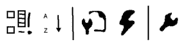
- (ApplicationSettings)
    - (PropertyBinding) (...)
- (DataBindings)
    - (Name) textBox1
    - AcceptsReturn False

Рис. 12.3. Привязка свойства элемента управления textbox

4. Появится диалоговое окно «Параметры приложения» (см. рис. 12.4). В этом окне щелкните раскрывающееся меню для свойства, которое нужно привязать, и выберите команду «Создать». Мы выберем свойство `Text`.

Страница 277

----------

    Параметры приложения для \"ТегtВоx1\" ? X
    Привязать свойства к параметрам приложения
    RightToleft (нет)
    Scrollßars (нет)
    ShortcutsEnabled (мет)
    Size (нет)
    Tabindex (ner)
    TabStop (нет)
    Tag (нет)
    Flext (нег)
    TextAliqn (нет)
    Для изменения параметров приложения и уп... служит конструктор проекта.
    Кнопка: OK.

Рис. 12.4. Выбор свойства Text для привязки к параметру



Примечание. В конструкторе не будут отображены свойства, тип которых определен в текущей сборке. Это известное ограничение. Для привязки такого свойства необходимо выполнить следующие действия:
* Вместо использования конструктора создайте параметр программы программным способом.
либо
* Переместите определение типа свойства в другой проект, постройте проект и добавьте ссылку на эту новую сборку в текущий проект. Свойство должно быть перечислено в окне «Параметры приложения».

5. В диалоговом окне «Новый параметр приложения» настройте параметр, указав его имя, значение по умолчанию (если допустимо) и область применения (см. рис. 12.5). Если указать область `Application` (Приложение), то это свойство будет общим для всех пользователей приложения и при выполнении его нельзя будет изменить. Если указать область `User` (Пользователь), то это свойство будет доступно для чтения и записи, и его значение может быть разным у разных пользователей.

Страница 278

------

    Новый параметр приложения ? X
    Создайте новый параметр приложения, заполнив ниже поля.
    DefaultValue Введите Вашу фамилию
    Name text1
    Scope User ▾
        くApplication
        く[User]
    Кнопка:OK
    Кнопка:Отмена

Рис. 12.5. Определение параметра

Для свойств формы и её элементов управления рекомендуется использовать область `User`. Для неизменяемых переменных программы, значения которых Вы не хотите хранить в программе, — область `Application`.

6. Если параметр содержит строку подключения, установите флажок «Строка подключения» в диалоговом окне.

7. Нажмите кнопку ОК в окнах «Новый параметр приложения» и «Параметры приложения». В результате этого в классе `Settings` будет создано свойство с именем `text1` для соответствующего параметра пользователя. А в папке `Properties` под файлом `Settings.settings` появится файл `Settings.Designer.cs`.

8. Новый параметр пользователя будет связан с указанным свойством `Text` элемента `textBox1`. Связь осуществляется в классе `Form1` файла `Form1.Designer.cs` с помощью привязки свойства `textBox1.Text` к свойству параметра `text1` объекта класса `Settings`. Ниже приведен фрагмент класса `Form1`, автоматически созданный для `textBox1` (пространство `System.Windows.Forms` опущено для компактности):

Страница 279

-------

```csharp
// textBox1
textBox1.DataBindings.Add(new Binding("Text", 
    WinApp.Properties.Settings.Default, 
    "text1", true, 
    DataSourceUpdateMode.OnPropertyChanged));

textBox1.Location = new System.Drawing.Point(58, 40);
textBox1.Margin = new Padding(4);
textBox1.Name = "textBox1";
textBox1.Size = new System.Drawing.Size(250, 27);
textBox1.TabIndex = 0;
textBox1.Text = WinApp.Properties.Settings.Default.text1;
```

Из приведенного фрагмента следует, что объект класса `Settings` возвращается с помощью свойства `Properties.Settings.Default`. Также мы видим, что сначала устанавливается привязка, а затем свойству `Text` присваивается значение параметра `text1`. Если привязка работает успешно, то последний оператор лишний. Поскольку мы выбираем сохраняемое свойство элемента управления в окне свойств, то тип этого свойства среде разработки известен (в нашем случае — `string`). Этот тип будет использован в классе `Settings` для приведения объекта.

9. Для управления отдельными параметрами программы используйте свойства объекта `Settings`. Для сохранения пользовательских настроек необходимо явным образом вызвать метод `Save`, унаследованный классом-оболочкой. Обычно это выполняется в обработчике событий `FormClosed` или `FormClosing` главной формы.

Страница 280

----------

10. Повторите шаги 1–6 для свойств формы `ClientSize` и `Location` и для свойства `Checked` элементов управления `CheckBox` и `RadioButton`. Присвойте соответствующим свойствам параметров следующие имена: `size`, `loc`, `checkB1`, `checkR1` и `checkR2`.

11. Создайте коллекцию строк элемента `comboBox1`: математика, программирование, экономика, история. Однако создать параметр для коллекции строк не получится (не поддерживается простая привязка). Остается только создать параметр для свойства `Text` этого элемента управления. Присвойте параметру имя `comboText`. Значения, присваиваемые параметрам по умолчанию, можно увидеть на рис. 12.8 в окне редактора параметров.


# Создание параметров приложения
12. Все созданные выше параметры, естественно, имели область применения `User`. Теперь в соответствие с пунктами 2–7 создадим для свойства `Text` элемента управления `label1` один параметр с областью `Application` (Приложение) и значением по умолчанию «Финансовый университет» (см. рис. 12.2). Параметру дадим имя `lab1`. Напомним: этот параметр нельзя изменять программным способом, но его можно изменить в файле `WinApp.exe.config` с помощью текстового редактора. Приведем фрагмент класса `Form1` (с незначительными упрощениями) для элемента управления `label1`. Если посмотрим, какой код сгенерировала среда Visual Studio в файле `Form1.Designer.cs`, то увидим, что никакой привязки там нет, что естественно. А значение для свойства `Text` выбирается из параметра.

```csharp
// label1
label1.AutoSize = true;
label1.Location = new System.Drawing.Point(54, 9);
label1.Name = "label1";
label1.Size = new System.Drawing.Size(228, 20);
label1.TabIndex = 3;
label1.Text = WinApp.Properties.Settings.Default.lab1;
```
Страница 281

----------

13. Для того чтобы наше приложение могло работать, создадим обработчики событий `button1_Click` и `Form1_FormClosed` по примеру приведенного ниже кода из файла `Form1.cs`.

```csharp
using System;
using System.Windows.Forms;

namespace WinApp
{
    public partial class Form1 : Form
    {
        public Form1()
        {
            InitializeComponent();
        }

        private void button1_Click(object sender, EventArgs e)
        {
            Properties.Settings.Default.Reset();
        }

        private void Form1_FormClosed(object sender, FormClosedEventArgs e)
        {
            Properties.Settings.Default.size = this.ClientSize;
            Properties.Settings.Default.Save();
        }
    }
}
```

Свойство `Properties.Settings.Default` возвращает объект класса-оболочки `Settings`. У этого объекта есть несколько методов и свойств. Метод `Reset` восстанавливает умолчаемые значения параметров пользователя и приложения. А метод `Save` сохраняет все текущие параметры пользователя в файле `user.config`. Оператор `Properties.Settings.Default.size = this.ClientSize;` добавлен в связи с тем, что привязка свойства `ClientSize` к параметру ведет себя непредсказуемым образом, поэтому эту привязку из файла `Form1.Designer.cs` лучше удалить и перестроить проект. На этом разработка приложения закончена. Теперь все готово для демонстрации сохранения параметров пользователем. Первый запуск приложения отобразит окно, приведенное на рис. 12.2. Введем новые данные и изменим состояние флажков и переключателя так, как это показано на рис. 12.6. Переместим окно в центр экрана. Закроем приложение и запустим его еще раз. Окно отобразится в центре с теми значениями свойств, которые имела форма на момент закрытия приложения.

Страница 282

----------

    Œ Fomm1 _OX
    Финансовый университет
    [Иванова]
    [X] участник олимпиады
    [Программирование▾]
    Пол:
    [ ] мужской
    [X] Женский
    Кнопка:Исходные мастройки

Рис. 12.6. Форма программы в процессе работы

Страница 282

-------

Теперь рассмотрим, как можно изменить доступный только для чтения параметр `lab1`. Зайдем в папку `bin/Debug` нашего проекта и откроем файл `WinApp.exe.config`. Вы увидите следующие строки:
```xml
<?xml version="1.0" encoding="utf-8"?>
<configuration>
  <configSections>
    <sectionGroup name="userSettings" type="System.Configuration.UserSettingsGroup, System, Version=4.0.0.0, Culture=neutral, PublicKeyToken=b77a5c561934e089">
      <section name="WinApp.Properties.Settings" type="System.Configuration.ClientSettingsSection, System, Version=4.0.0.0, Culture=neutral, PublicKeyToken=b77a5c561934e089" allowExeDefinition="MachineToLocalUser" requirePermission="false" />
    </sectionGroup>
    <sectionGroup name="applicationSettings" type="System.Configuration.ApplicationSettingsGroup, System, Version=4.0.0.0, Culture=neutral, PublicKeyToken=b77a5c561934e089">
      <section name="WinApp.Properties.Settings" type="System.Configuration.ClientSettingsSection, System, Version=4.0.0.0, Culture=neutral, PublicKeyToken=b77a5c561934e089" requirePermission="false" />
    </sectionGroup>
  </configSections>
  <startup>
    <supportedRuntime version="v4.0" sku=".NETFramework,Version=v4.5.2" />
  </startup>
  <userSettings>
    <WinApp.Properties.Settings>
      <setting name="text1" serializeAs="String">
        <value>Введите фамилию</value>
      </setting>
      <setting name="checkB1" serializeAs="String">
        <value>False</value>
      </setting>
      <setting name="checkR1" serializeAs="String">
        <value>True</value>
      </setting>
      <setting name="checkR2" serializeAs="String">
        <value>False</value>
      </setting>
      <setting name="loc" serializeAs="String">
        <value>0, 19</value>
      </setting>
      <setting name="size" serializeAs="String">
        <value>510, 289</value>
      </setting>
      <setting name="comboText" serializeAs="String">
        <value>Выберите предмет</value>
      </setting>
    </WinApp.Properties.Settings>
  </userSettings>
  <applicationSettings>
    <WinApp.Properties.Settings>
      <setting name="lab1" serializeAs="String">
        <value>Финансовый университет</value>
      </setting>
    </WinApp.Properties.Settings>
  </applicationSettings>
</configuration>
```

Страница 283

-----

Найдите элемент с именем `lab1` и измените строку "Финансовый университет" на "Высшая школа экономики":
```xml
<setting name="lab1" serializeAs="String">
  <value>Высшая школа экономики</value>
</setting>
```
Сохраните изменения и закройте редактор. Запустите программу: Вы увидите, что в окне отобразилось название другого вуза. Совет. В целях обеспечения безопасности не сохраняйте пароли и другую конфиденциальную информацию в параметрах, так как они доступны для чтения.

# Архитектура параметров.

Рассмотрим, как выглядит наш проект в окне обозревателя решения (см. рис. 12.7).

Страница 284

-------

    Обозреватель решений
    ⇐ ⇒ 🛖 | ⏰ ▾ ⇄ 📑 | 🔧 🎞️
    Обозреватель решений - поиск (Ctri +;) 🔎▾
    🧻 Решение "WinApp" (проектов: 1)
    < [C#] WinApp
        < 🔧 Properties
            C# Assemblylnfo.cs
        < 📑 Resources.resx
        < ⚙️ Settings.settings
            < 📑 Settings.Designer.cs
        < 🧻 Ссылки
            < App.config
        < 🧻 Form1.cs
        < [C#] Program.cs
        < [C#] Settings.cs
Рис. 12.7. Окно обозревателя решения

Как следует из рис. 12.7, в папке `Properties` созданы два файла — `Settings.settings` и `Settings.Designer.cs`. Файл `Settings.settings` — это XML-файл, создаваемый при определении параметров пользователя и приложения в окне свойств. Содержимое этого файла является основой для создания класса-оболочки в файле `Settings.Designer.cs`. Двойной щелчок строки `Settings.settings` приводит к загрузке редактора параметров и отображению содержимого этого файла в графическом виде (см. рис. 12.8).

Страница 285

--------


Какой-то текст.
Какой-то многострочный текст.

||Имя|Тип|Область|Значение|
|---|---|---|---|---|
|->|Темп1|string▾|Пользователь▾|Infiniti Infiniti|
||check1|tool▾|Пользователь▾|False|
||check1|tool▾|Пользователь▾|True|
||check2|tool▾|Пользователь▾|False|
||ios|System.Dra...▾|Пользователь▾|3.19|
||ComboText|String▾|Пользователь▾|Выберите предмет|
||tab1|String▾|Пользователь▾|Варианты универсальный|

Рис. 12.8. Окно редактора параметров

Редактор параметров позволяет вносить изменения в поля созданных параметров, не прибегая к повторному использованию окна свойств. Эти изменения будут тут же автоматически произведены и в классе-оболочке. Окно редактора параметров позволяет создавать параметры, не привязывая их к свойствам элементов управления. Выбор меню «<>Перейти к коду» создает файл `Settings.cs` (см. рис. 12.9) и отображает его содержимое на экране. Вот содержание файла `Settings.cs`:

```csharp
namespace WinApp.Properties
{
    // Этот класс позволяет обрабатывать определенные события в классе параметров:
    // Событие SettingChanging возникает перед изменением значения параметра.
    // Событие SettingsLoaded возникает после загрузки значений параметров.
    // Событие SettingsSaving возникает перед сохранением значений параметров.
    internal sealed partial class Settings
    {
        public Settings()
        {
            // Для добавления обработчиков событий для
            // сохранения и изменения параметров
            // раскомментируйте приведенные ниже строки:
            // this.SettingChanging += this.SettingChangingEventHandler;
            // this.SettingsSaving += this.SettingsSavingEventHandler;
        }

        private void SettingChangingEventHandler(object sender, System.Configuration.SettingChangingEventArgs e)
        {
            // Добавьте здесь код для обработки события SettingChanging.
        }

        private void SettingsSavingEventHandler(object sender, System.ComponentModel.CancelEventArgs e)
        {
            // Добавьте здесь код для обработки события SettingsSaving.
        }
    }
}
```
Страница 286

------------

Как мы видим, файл `Settings.cs` — это первая часть (`partial`) класса-оболочки, доступная разработчику для внесения кода. Файл `Settings.settings` по умолчанию создается в любом проекте Windows Forms в папке `Properties`. Но если Вам потребуется еще один такой файл, то щелкните правой кнопкой строку проекта, в контекстном меню выберите пункт «Добавить», далее пункт «Создать элемент». В открывшемся окне шаблонов выберите шаблон «Файл настроек». После этого в проекте появится файл `Settings1.settings` и будет открыто окно редактора параметров. Можете создавать параметры в этом окне.

Страница 287

---------

# Содержимое класса Settings



Для того чтобы чувствовать себя специалистом в области создания и сохранения параметров, необходимо рассмотреть сгенерированный средой Visual Studio класс-оболочку `Settings`, находящийся в файле `Settings.Designer.cs`. Основное назначение класса-оболочки — создать объект этого класса и связать каждый параметр со своим свойством. Ниже приведен текст класса-оболочки (с несущественными изменениями, улучшающими читабельность).

    using global::System.Configuration;
    using global::System. Diagnostics;
    namespace WinApp.Properties
    {
        [System.Runtime.CompilerServices.CompilerGeneratedAttribute())
        [System.CodeDom.Compiler.GeneratedCodeAttribute
            ("Microsoft.VisualStudio.Editors.SettingsDesigner.SettingsSingleFileGenerator", "14.0.0.0")
        ]
        internal sealed partial class Settings: ApplicationSettingsBase
        {
            private static Settings defaultInstance = 
                (Settings)
                (ApplicationSettingsBase.Synchronized (new Settings()))
            ;
            public static Settings Default
            {get { return defaultinstance;})

Страница 288

---------




            [UserScopedSettingAttribute()]
            [DebuggerNonUserCodeAttribute()]
            [DefaultSetting ValueAttribute("Введите фамилию")]
            public string text1
            {
                get 
                {
                    return ((string)(this["text1"])); 
                }
                set 
                {
                    this["text1"] = value;
                }
            }


            [UserScopedSetting Attribute()]
            [DebuggerNonUserCodeAttribute()]
            [DefaultSettingValueAttribute("False")]
            public bool checkB1
            {
                get 
                {
                    return ((bool)(this["checkB1"]));
                }
                set 
                {
                    this["checkB1"] = value; 
                }
            }

            [UserScopedSettingAttribute()]
            [DebuggerNonUserCodeAttribute)]
            [DefaultSetting ValueAttribute("True")]
            public bool checkR1
            {
                get 
                {
                    return ((bool)(this["checkR1"]));
                }
                set 
                {
                    this["checkR1"] = value;
                }
            }

            [UserScopedSettingAttributeO)]
            [DebuggerNonUserCodeAttribute()]
            [DefaultSetting ValueAttribute("False")]
            public bool checkR2
            {
                get
                {
                    return ((bool)(this["checkR2"]));
                }
                set 
                {
                    this["checkR2"] = value;
                }
            }

Страница 289

----------

            [UserScopedSettingAttribute.
            [DebuggerNonUserCodeAttribute()]
            [DefaultSettingValueAttribute("0, 19")]
            public System.Drawing.Point loc
            {
                get
                {
                    return ((System.Drawing,Point)(this("loc"]));
                }
                set
                {
                    this["loc"] = value;
                }
            }

            [UserScopedSettingAttribute()]
            [DebuggerNonUserCodeAttribute()]
            [DefaultSetting ValueAttribute("510, 289")]
            public System.Drawing.Size size
            {
                get
                {
                    return ((System. Drawing Size) (this["size"]));
                }
                set
                {
                    this["size"] = value;
                }
            }

            [UserScopedSettingAttribute()]
            [DebuggerNonUserCodeAttribute()]
            [DefaultSettingValueAttribute("Выберите предмет")]
            public string comboText
            {
                get 
                {
                    return ((string)(this["comboText"]));
                }
                set
                { 
                    this"comboText"] = value; 
                }
            }

            [ApplicationScopedSettingAttribute()]
            [DebuggerNonUserCodeAttribute()]
            [DefaultSetting ValueAttribute("Финансовый университет"))
            public string lab1
            {
                get
                {
                    return ((string)(this["lab1"]));
                }
            }
        }
    }

Страница 290

--------

Приведенный листинг показывает, что классом-оболочкой является класс Settings, наследующий от системного класса `ApplicationSettingsBase`. Оператор, следующий за определением класса, создает обьект класса `Settings` со статическим именем `defaultInstance`. А ниже следует открытое свойство `Default` для извлечения этого объекта. Таким образом, чтобы получить доступ к какому-нибудь члену класса `Settings` или класса `ApplicationSettingsBase`, например к методу `Save`, необходимо использовать следующий оператop: `Properties.Settings.Default.Save()`;

Таким же образом следует обращаться и к свойствам парамеров. Всю остальную часть класса занимают свойства параметров. Рассмотрим подробно свойство параметра `checkB1`:

    [UserScopedSetting Attribute()]
    [DebuggerNonUserCodeAttribute()]
    [DefaultSetting ValueAttribute("False")]
    public bool checkR1
    {
        get
        {
            return ((bool)(this["checkB1"]));
        }
        set
        {
            this["checkB1"] = value;
        }
    }
Страница 291

---------

Первые три строки — это атрибуты. Атрибут `UserScopedSetting` определяет область применения параметра, то есть «пользователь». Альтернативным вариантом является атрибут `ApplicationScopedSetting`, определяющий область приложения (см. параметр `lab1`). Атрибут `DefaultSettingValueAttribute` определяет значение по умолчанию. В нашем примере — `False`. Далее следует определение свойства с аксессорами `get` и `set`. Во время выполнения программы значение выбирается из кэш-памяти и сохраняется в кэш-памяти по имени параметра с помощью индексатора класса `ApplicationSettingsBase` (точнее его базового класса `SettingsBase`). Таким образом, параметр и его свойство имеют одно и то же имя. В качестве индекса используется имя параметра. Выбираемое свойством значение преобразуется из типа `Object` в тип `bool`. Этот тип был автоматически определен из свойства `Checked` элемента управления `CheckBox`, когда в окне свойств среды Visual Studio мы выбрали `Checked` для привязки к параметру. Для параметра приложения (`lab1`) аксессор `set` отсутствует, поэтому изменение параметра невозможно. Это соответствует назначению параметров приложения.

# XML-файлы
Кроме файлов, имена которых отображаются в окне обозревателя решения, среда Visual Studio, как было описано выше, создает также XML-файл `WinApp.exe.config`. Этот файл размещается там же, где и исполняемый файл приложения (см. рис. 12.10). Его содержимое было показано выше. Если в проекте созданы параметры пользователя, то создается файл `user.config`. Как найти этот файл, также было рассмотрено выше. Содержимое файла `.config` является результатом XML-сериализации.

    Имя
    WinApp.exe
    WinApp.exe.config
    WinApp.pdb
    WinApp.vshost.exe
    WinApp.vshost.exe.config

Рис. 12.10. Содержимое папки bin/Debug проекта

Страница 292

--------

Файл хранит текущие значения параметров. Для нашего приложения файл `.config` после сохранения параметров имеет следующее содержимое:

```xml
<?xml version="1.0" encoding="utf-8"?>
<configuration>
  <userSettings>
    <WinApp.Properties.Settings>
      <setting name="text1" serializeAs="String">
        <value>Иванова</value>
      </setting>
      <setting name="checkB1" serializeAs="String">
        <value>True</value>
      </setting>
      <setting name="checkR1" serializeAs="String">
        <value>False</value>
      </setting>
      <setting name="checkR2" serializeAs="String">
        <value>True</value>
      </setting>
    </WinApp.Properties.Settings>
  </userSettings>
</configuration>
```
Обратите внимание: в файле отсутствует параметр приложения `lab1`, так как этот параметр не может изменяться программно.

Страница 293

---------

# Значения, используемые по умолчанию
Как уже было сказано, файл `WinApp.exe.config`, хранящий исходные значения, должен находиться в папке выполняемого exe-файла приложения. С одной стороны, это не очень удобно иметь еще один файл, но с другой стороны, Вы можете в любой момент, не перекомпилируя программу, изменить в текстовом редакторе значения по умолчанию. Файл `app.exe.config` удалять нельзя. Если этот файл создан средой разработки Visual Studio, то без этого файла приложение работать не будет. Несмотря на то, что значения по умолчанию определены в классе с помощью атрибута, предпочтение отдается XML-файлу `app.exe.config`. То есть, если в файле `app.exe.config` найден требуемый параметр, то используется то значение, которое указано в элементе `<value>` этого параметра. Если параметр не найден, то используется значение, определенное в атрибуте `DefaultSettingValueAttribute` в классе параметров.


# Класс ApplicationSettingsBase
Класс `ApplicationSettingsBase` выполняет сохранение параметров в кэш-памяти и на диске и автоматическое чтение параметров из файла в кэш-память. Класс предоставляет несколько полезных методов, свойств и событий. Приведем перечень членов класса `ApplicationSettingsBase`.

Конструкторы:
* `ApplicationSettingsBase()` — инициализирует экземпляр класса `ApplicationSettingsBase` в состояние по умолчанию.
* `ApplicationSettingsBase(IComponent)` — выполняет инициализацию нового экземпляра класса `ApplicationSettingsBase` с помощью предоставленного компонента-владельца.
* `ApplicationSettingsBase(String)` — выполняет инициализацию нового экземпляра класса `ApplicationSettingsBase` с помощью предоставленного ключа параметров для устранения неоднозначности различных экземпляров параметров класса-оболочки в одном домене приложения.
* `ApplicationSettingsBase(IComponent, String)` — выполняет инициализацию нового экземпляра класса `ApplicationSettingsBase` с помощью предоставленного компонента-владельца и ключа параметров.
* `ApplicationSettingsBase(String)` — выполняет инициализацию нового экземпляра класса `ApplicationSettingsBase` с помощью предоставленного ключа параметров для устранения неоднозначности различных экземпляров параметров класса-оболочки в одном домене приложения.
* `ApplicationSettingsBase(IComponent, String)` выполняет инициализацию экземпляра класса `ApplicationSettingsBase` с помощью предоставленного компонента-владельца и ключа параметров. Все конструкторы защищены (`protected`).

Страница 294

-----------

# Наиболее значимые методы:
* `Initialize` — инициализирует внутренние свойства, используемые объектом `SettingsBase`. (Унаследовано от `SettingsBase`.)
* `Reload` — обновляет параметры из XML-файла, то есть отменяет все сохраняемые установки, выполненные пользователем в течение сеанса, и восстанавливает состояние приложения на момент его запуска.
* `Reset` — восстанавливает умолчаемые значения параметров пользователя и приложения. Перед загрузкой данных кэш-память очищается.
* `Save` — сохраняет текущие значения свойств параметров пользователя в XML-файле. (Переопределяет `SettingsBase.Save()`.)
* `Synchronized` — (Static) предоставляет класс `SettingsBase`, являющийся синхронизированным (потокобезопасным). (Унаследовано от `SettingsBase`.)
* `Upgrade` — обновляет параметры программы, чтобы отразить недавнюю установку приложения.

# Свойства:
* `Context` — возвращает контекст параметров приложения, связанный с группой приложений. (Переопределяет `SettingsBase.Context`.)
* `IsSynchronized` — возвращает значение, указывающее на то, является ли доступ к объекту синхронизированным (потокобезопасным). (Унаследовано от `SettingsBase`.)
* `this[]` — индексатор. Возвращает или задает значение указанного свойства параметра. (Переопределяет `SettingsBase.Item[String]`.) Если параметр не найден, то возвращается `null`.
* `Properties` — возвращает коллекцию свойств параметров в классе-оболочке. (Переопределяет `SettingsBase.Properties`.)
* `PropertyValues` — возвращает коллекцию значений свойств параметров. (Переопределяет `SettingsBase.PropertyValues`.)
* `Providers` — возвращает коллекцию поставщиков параметров программы, используемую программой-оболочкой. (Переопределяет `SettingsBase.Providers`.)
* `SettingsKey` — возвращает или задает ключ параметров группы параметров программы.

Страница 295

--------

# События:
* `PropertyChanged` — возникает после изменения с помощью `set` свойства параметра пользователя.
* `SettingChanging` — возникает перед изменением с помощью `set` свойства параметра пользователя.
* `SettingsLoaded` — происходит после извлечения параметров программы из XML-файла.
* `SettingsSaving` — возникает перед сохранением значений в XML-файле.

Рассмотрим подробнее работу индексатора (свойство `Item` в документации). Когда индексатор любого параметра в методе `get` или `set` в первый раз получает управление, он загружает значения всех параметров в кэш-память. Затем при последующих вызовах индексаторы выбирают требуемые значения из кэш-памяти.

Индексатор вызывает несколько событий, в зависимости от выполняемой операции:
* При первом извлечении свойства вызывается событие `SettingsLoaded`. Событие `SettingsLoaded` возникает только после метода `get` индексатора, выполняемого первый раз, то есть в момент загрузки параметров в кэш-память. Если параметры уже были загружены методом `set` индексатора, то событие не возникнет, пока кэш не будет очищен. После загрузки параметров в кэш-память последующие доступы используют эти значения. Методы `Reset` и `Reload` очистят все кэшированные значения, поэтому данное событие будет вызвано вновь при последующем вызове метода `get` свойства.
* После установки свойства вызывается событие `OnSettingChanging`. Если обработчик не отменяет событие, тогда устанавливается значение свойства и вызывается событие `PropertyChanged`.

Страница 296

-----------

# СОХРАНЕНИЕ СПИСКА СТРОК ЭЛЕМЕНТОВ ComboBox и ListBox



СОХРАНЕНИЕ СПИСКА СТРОК ЭЛЕМЕНТОВ `ComboBox` И `ListBox`. Усложним ранее решенную задачу: перетащим на форму кнопку с текстом "+" для добавления новой строки в элемент управления `ComboBox` и кнопку с текстом "-" для удаления текущей строки из этого элемента управления (см. рис. 12.11).

    œ Form1 _OX
    финансовый университет
    [Иванов]
    [X]Участники олимпиады
    [Программирования▾]
    Пол:
    [ ]Мужской
    [X]Женский
    Кнопка: исходный настройки

Рис. 12.11. Модифицированное окно приложения.

Если список элемента управления `comboBox1` будет изменен, возникнет необходимость в сохранении списка, иначе все изменения пропадут.

Страница 297

------------

Для сохранения списка выберем в Редакторе параметров (см. рис. 12.8) строку, помеченную символом `*`, и заменим `Settings` на `Strings`. Далее, для этого параметра раскроем список типов и выберем `StringCollection` из пространства имен `System.Collections.Specialized`. В четвертом столбце можно ввести список строк, используемых по умолчанию. В этом случае список строк элемента управления, заданный в окне свойств, будет проигнорирован. Поэтому возможны два варианта источника строк, запоминаемых в XML-файле при первом запуске программы:

1. Для параметра определяется список строк по умолчанию, и он будет запоминаться в XML-файле при первом запуске программы.
2. Список строк определяется для элемента управления `ComboBox` или `ListBox` в программе или в окне свойств. Список строк по умолчанию для параметра не задается. В XML-файле при первом запуске программы будет запоминаться список строк из `ComboBox`.

# Рассмотрим реализацию этих случаев.
Вариант 1. Для параметра вводим список строк по умолчанию в Редакторе параметров. В этом случае список строк для `ComboBox`, если он есть, будет проигнорирован. Будем использовать сложную привязку элемента управления к списку параметра, для чего перетащим компонент `BindingSource` на форму и привяжем его к параметру `Strings`. Элемент управления `ComboBox` привяжем к `BindingSource`. Новую строку добавлять в `ComboBox` нельзя, так как этот элемент управления привязан к источнику данных, поэтому будем добавлять ее в источник данных, то есть в список параметра. Для запоминания выбранной в списке `ComboBox` строки нельзя использовать создание параметра в окне свойств, так как сложная привязка `comboBox1` к источнику перекрывает простую привязку его текстового поля, то есть в свойстве `comboBox1.Text` всегда будет отображаться одна и та же строка списка. Для решения этой проблемы создадим в Редакторе параметров новый параметр с именем `comboText` типа `string` и значением по умолчанию.

Страница 298

--------

Присвоим этот параметр свойству `comboBox1.Text` в обработчике `Form1_Load`. А перед сохранением параметров установим этот параметр в текущее значение. В целом, программа может выглядеть следующим образом:

```csharp
using System;
using System.Windows.Forms;

namespace WindowsFormsApplication1
{
    public partial class Form1 : Form
    {
        Properties.Settings set = Properties.Settings.Default;

        public Form1()
        {
            InitializeComponent();
        }

        private void Form1_Load(object sender, EventArgs e)
        {
            bindingSource1.DataSource = set.Strings;
            comboBox1.DataSource = bindingSource1;
            comboBox1.Text = set.comboText;
        }

        private void Добавить_Click(object sender, EventArgs e)
        {
            set.Strings.Add(textBox2.Text);
            bindingSource1.ResetBindings(false);
        }

        private void Выход_Click(object sender, EventArgs e)
        {
            set.comboText = comboBox1.Text;
            set.Save();
            Close();
        }
    }
}
```
Страница 299

----------

Сохранение списка строк элемента `ListBox` еще проще, так как не надо дополнительно сохранять текстовое поле.

__Вариант 2__. Это универсальный способ, позволяющий использовать способ 1. Так как при первом запуске программы предпочтение будет отдано списку строк параметра, то для того чтобы изначально запомнились строки списка `ComboBox`, необходимо, чтобы в Редакторе список строк по умолчанию для параметра не создавался (см. рис. 12.8). Если параметр имеет значения по умолчанию, то список `ComboBox` игнорируется, и тогда мы получаем первый вариант. Не имеет смысла задавать и значение по умолчанию для параметра `ComboText`. Если у параметра `Strings` отсутствует список или он пустой, то его заполняем строками из `ComboBox`. Здесь же запоминаем в параметре значение свойства `comboBox1.Text`. Для работы с коллекцией строк добавьте пространство имен `System.Collections.Specialized`. Далее всё остается как в первом варианте.

Страница 300

-----------